In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import os

/tmp/ipykernel_89623/1736309343.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
FILEPATH = '/home/renaj/DIQ/'
os.chdir(FILEPATH)

In [3]:
from utils.utils.utils import _traj_to_dir

Files already downloaded and verified


In [6]:
os.getcwd()

'/home/renaj/DIQ'

In [7]:
from v2e import v2ecore

In [8]:
v2ecore

<module 'v2e.v2ecore' from '/home/renaj/DIQ/v2e/v2ecore/__init__.py'>

In [14]:
from datagenerator import im2events

In [15]:
from utils.preprocess import cutEdges 

In [6]:
from configs.envar import CAMERA_RES, DVS_RES, CIFAR, IM_SIZE

In [7]:
# testing parameters 
imix_list = [42, 175, 3011, 4091, 1948, 1776, 65]
refrac_pd_list = {'no':0.0, 'med':0.02,'high':0.05}
threshold_list = {'low':0.2, 'med':0.4, 'high':0.8}


## Spikes by direction dynamics </br>

### For this notebook, CAMERA_RES was set to DVS_RES for longer walk

### 60 random steps + 40 steps paused </br>
Frames cut </br>
Parameters - threshold ; refractory period

In [9]:
def get_spikes_by_direc(imix, refrac_pd,threshold,nsteps, npause):
    vec_counts_ = {"N":[],"S":[],"W":[],"E":[],"NW":[],"NE":[],"SW":[],"SE":[]}

    vec_counts_clean = {"N":[],"S":[],"W":[],"E":[],"NW":[],"NE":[],"SW":[],"SE":[]}

    for vec in vec_counts_.keys():
        events, traj = im2events(img=imix,vec=vec,refrac_pd=refrac_pd, pos_thres=threshold, neg_thres=threshold, 
                                 nsteps=nsteps+npause,paused = [i for i in range(nsteps,nsteps + npause)],
                                 frame_h = DVS_RES[0],frame_w = DVS_RES[1])
        vec_counts_[vec] = [len(e) for e in events]
        
        cutevents, cutcounts = cutEdges(events,traj)
        # cutcounts = [len(cutevent) for cutevent in cutevents]
        vec_counts_clean[vec] = cutcounts

    return vec_counts_, vec_counts_clean

### No RP, high threshold

In [10]:
ix_raw = {}
ix_cut = {}
for ix in imix_list:
    rawspikecount, cleanspikecount = get_spikes_by_direc(imix=ix,refrac_pd=refrac_pd_list['no'],threshold=threshold_list['high'],nsteps=60,npause=40)
    ix_raw[ix] = rawspikecount
    ix_cut[ix] = cleanspikecount

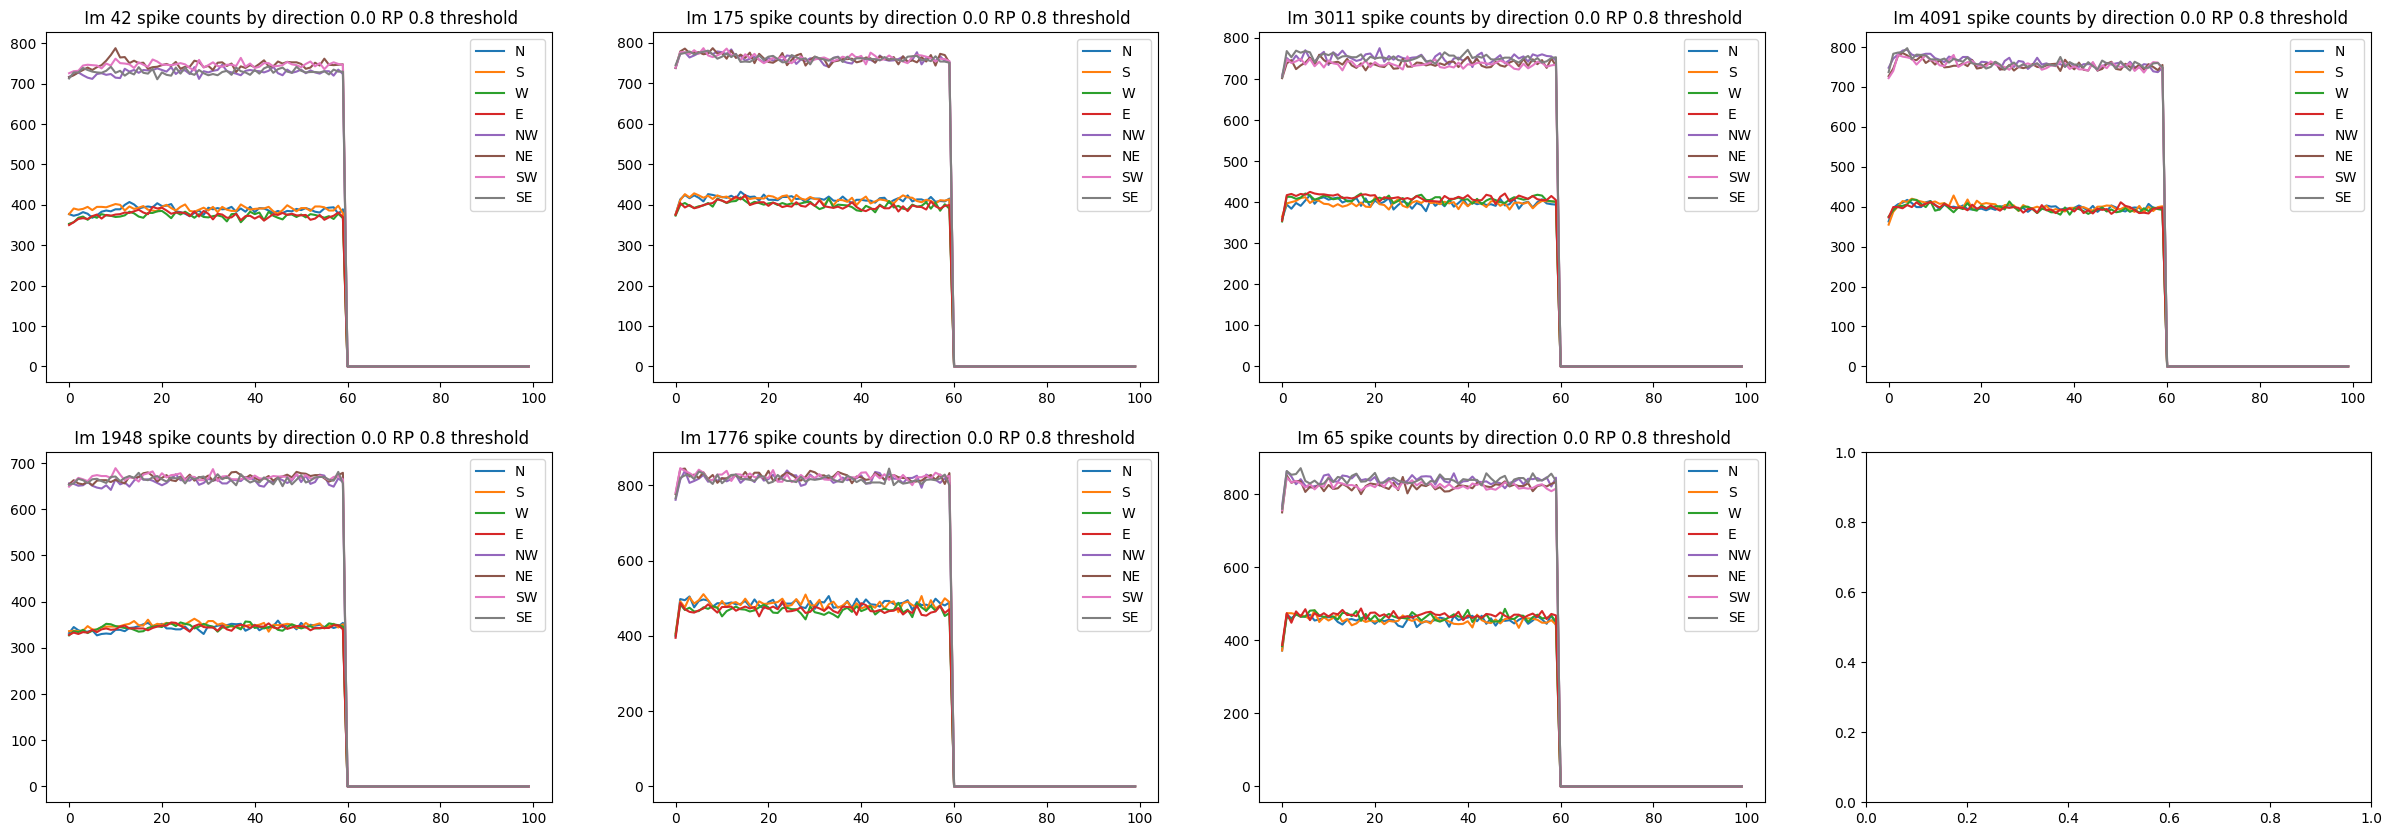

In [45]:
cut = ""
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
# for ix in ix_raw.keys():
    if i < len(ix_raw):
        ix = list(ix_raw.keys())[i]
        
        
        pd.DataFrame(ix_raw[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['no']} RP {threshold_list['high']} threshold", ax=ax)
plt.show()

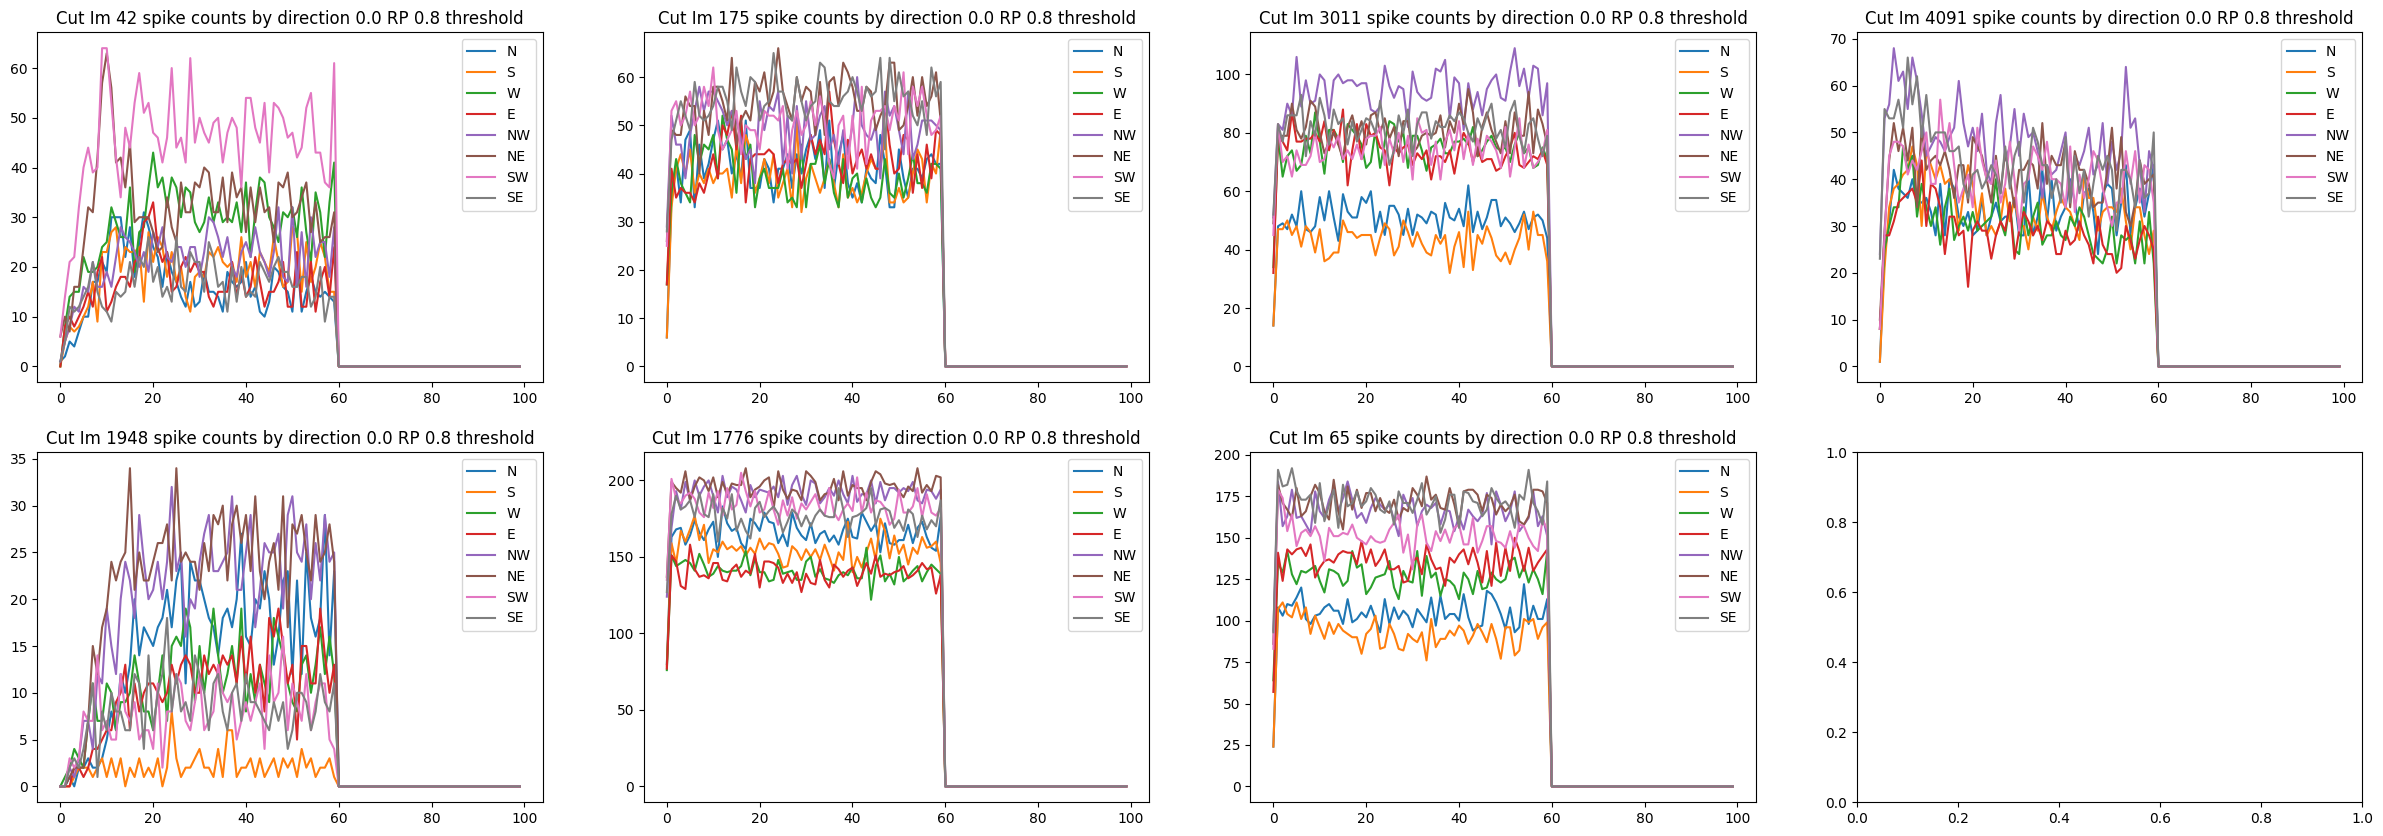

In [11]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    # for ix in ix_cut.keys():
    if i < len(ix_cut):
        ix = list(ix_cut.keys())[i]
        
        pd.DataFrame(ix_cut[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['no']} RP {threshold_list['high']} threshold", ax = ax)

plt.show()

### No RP, med threshold

In [13]:
ix_raw = {}
ix_cut = {}
for ix in imix_list:
    rawspikecount, cleanspikecount = get_spikes_by_direc(imix=ix,refrac_pd=refrac_pd_list['no'],threshold=threshold_list['med'],nsteps=60,npause=40)
    ix_raw[ix] = rawspikecount
    ix_cut[ix] = cleanspikecount

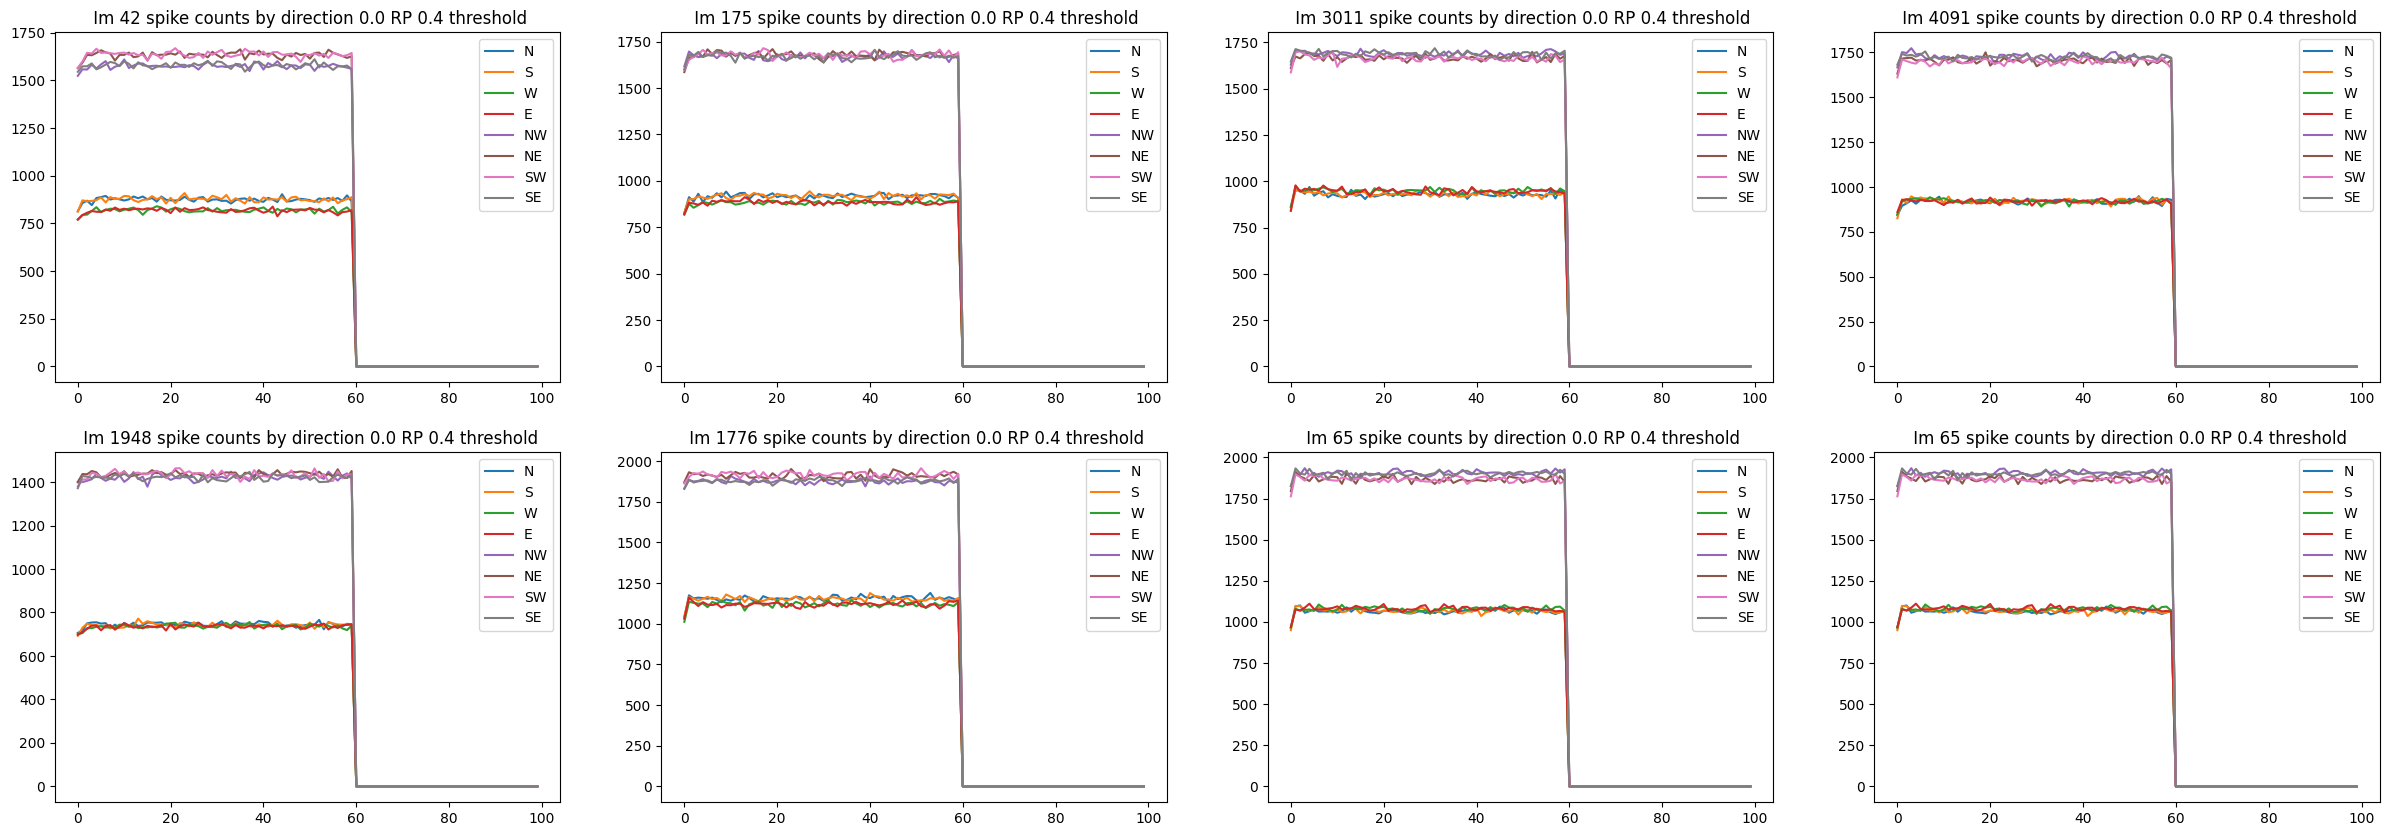

In [15]:
cut = ""
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    if i < len(ix_raw):
        ix = list(ix_raw.keys())[i]
    pd.DataFrame(ix_raw[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['no']} RP {threshold_list['med']} threshold", ax = ax)
plt.show()

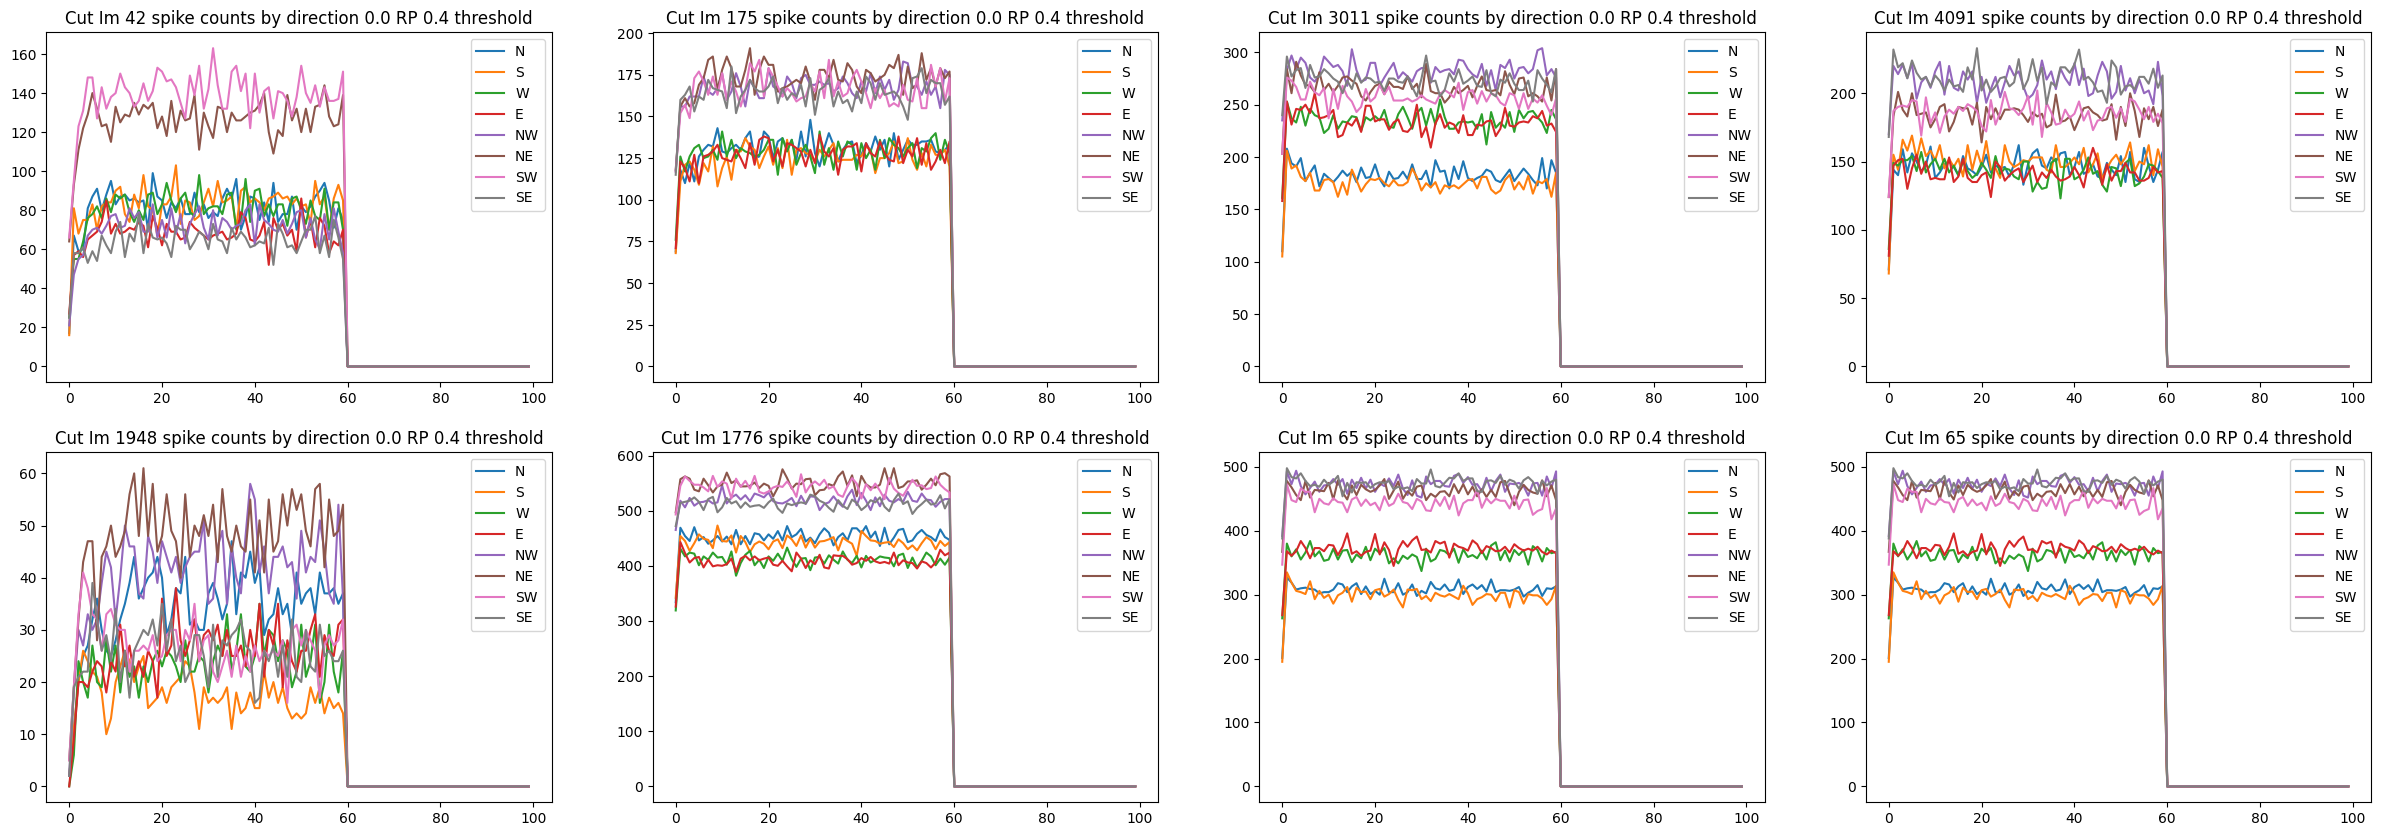

In [16]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):

    if i < len(ix_cut):
        ix = list(ix_cut.keys())[i]
    pd.DataFrame(ix_cut[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['no']} RP {threshold_list['med']} threshold", ax = ax)
plt.show()

### High RP, med threshold

In [17]:
ix_raw = {}
ix_cut = {}
for ix in imix_list:
    rawspikecount, cleanspikecount = get_spikes_by_direc(imix=ix,refrac_pd=refrac_pd_list['high'],threshold=threshold_list['med'],nsteps=60,npause=40)
    ix_raw[ix] = rawspikecount
    ix_cut[ix] = cleanspikecount

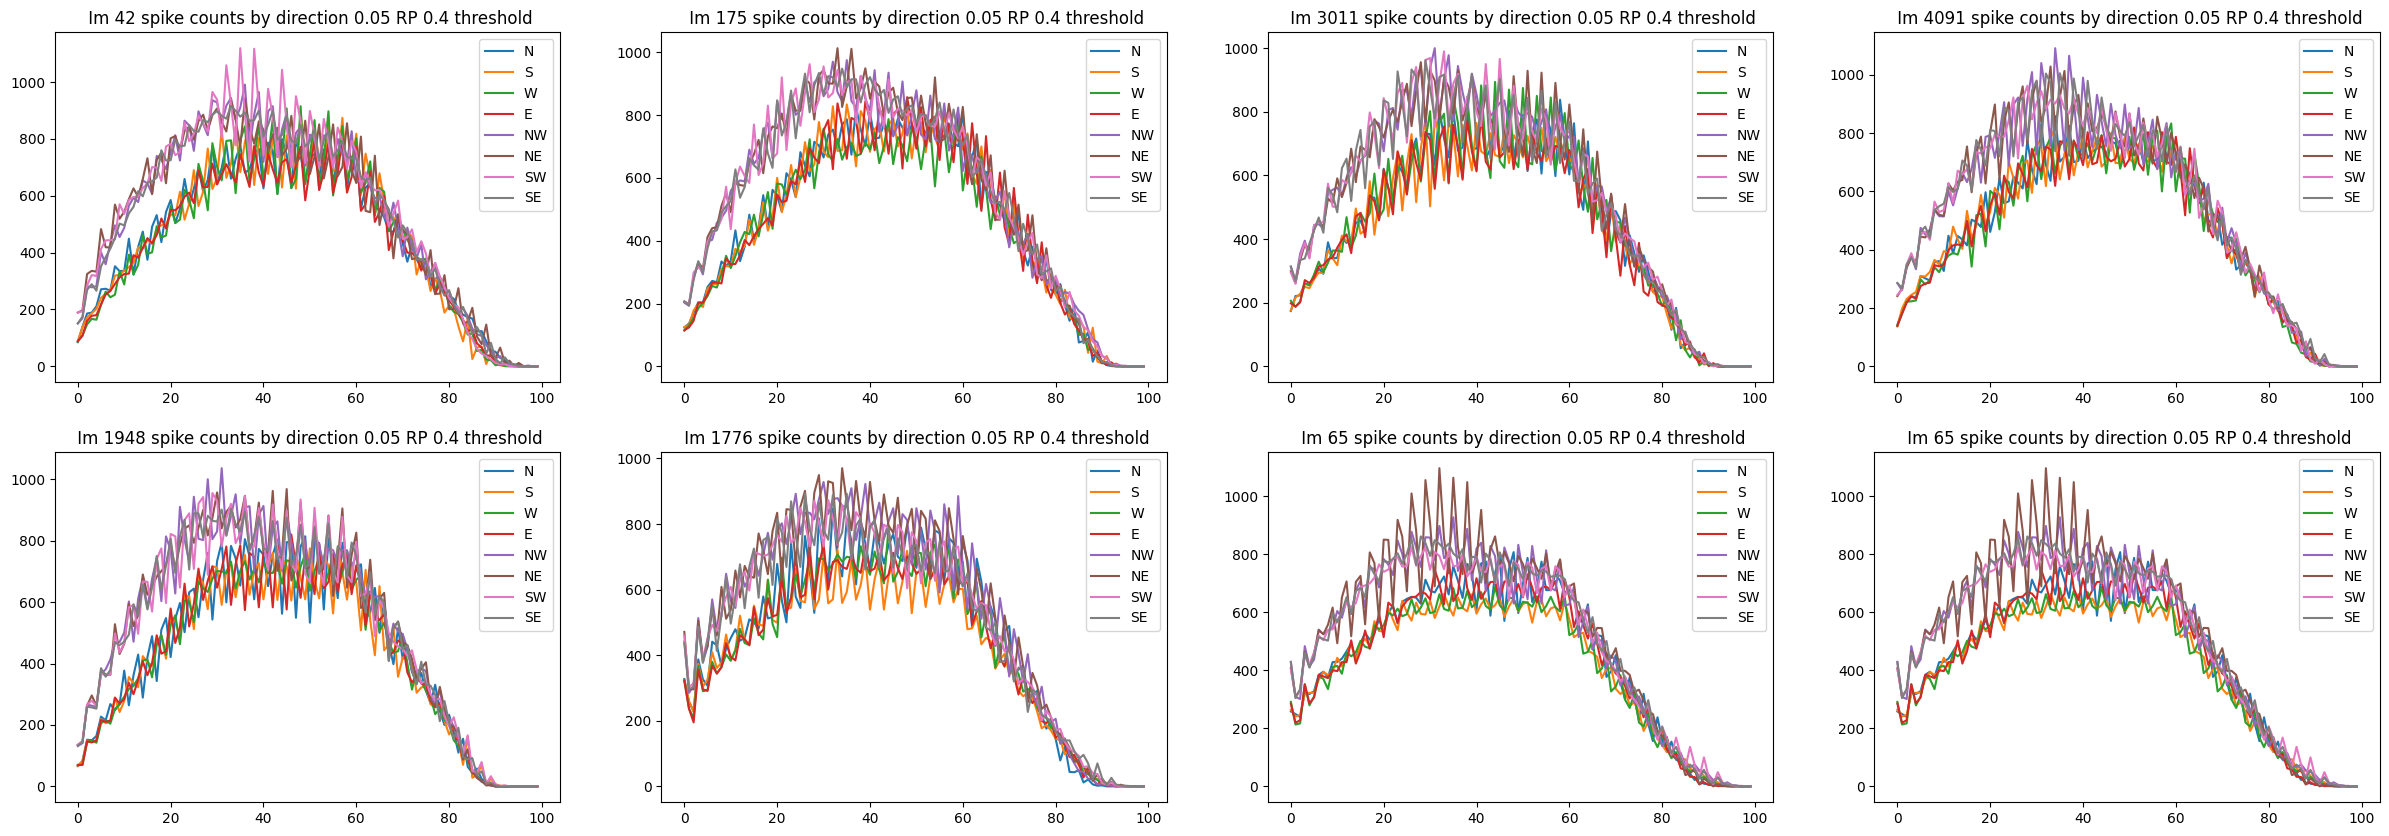

In [18]:
cut = ""
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    if i < len(ix_raw):
        ix = list(ix_raw.keys())[i]

    pd.DataFrame(ix_raw[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['high']} RP {threshold_list['med']} threshold", ax = ax)

plt.show()

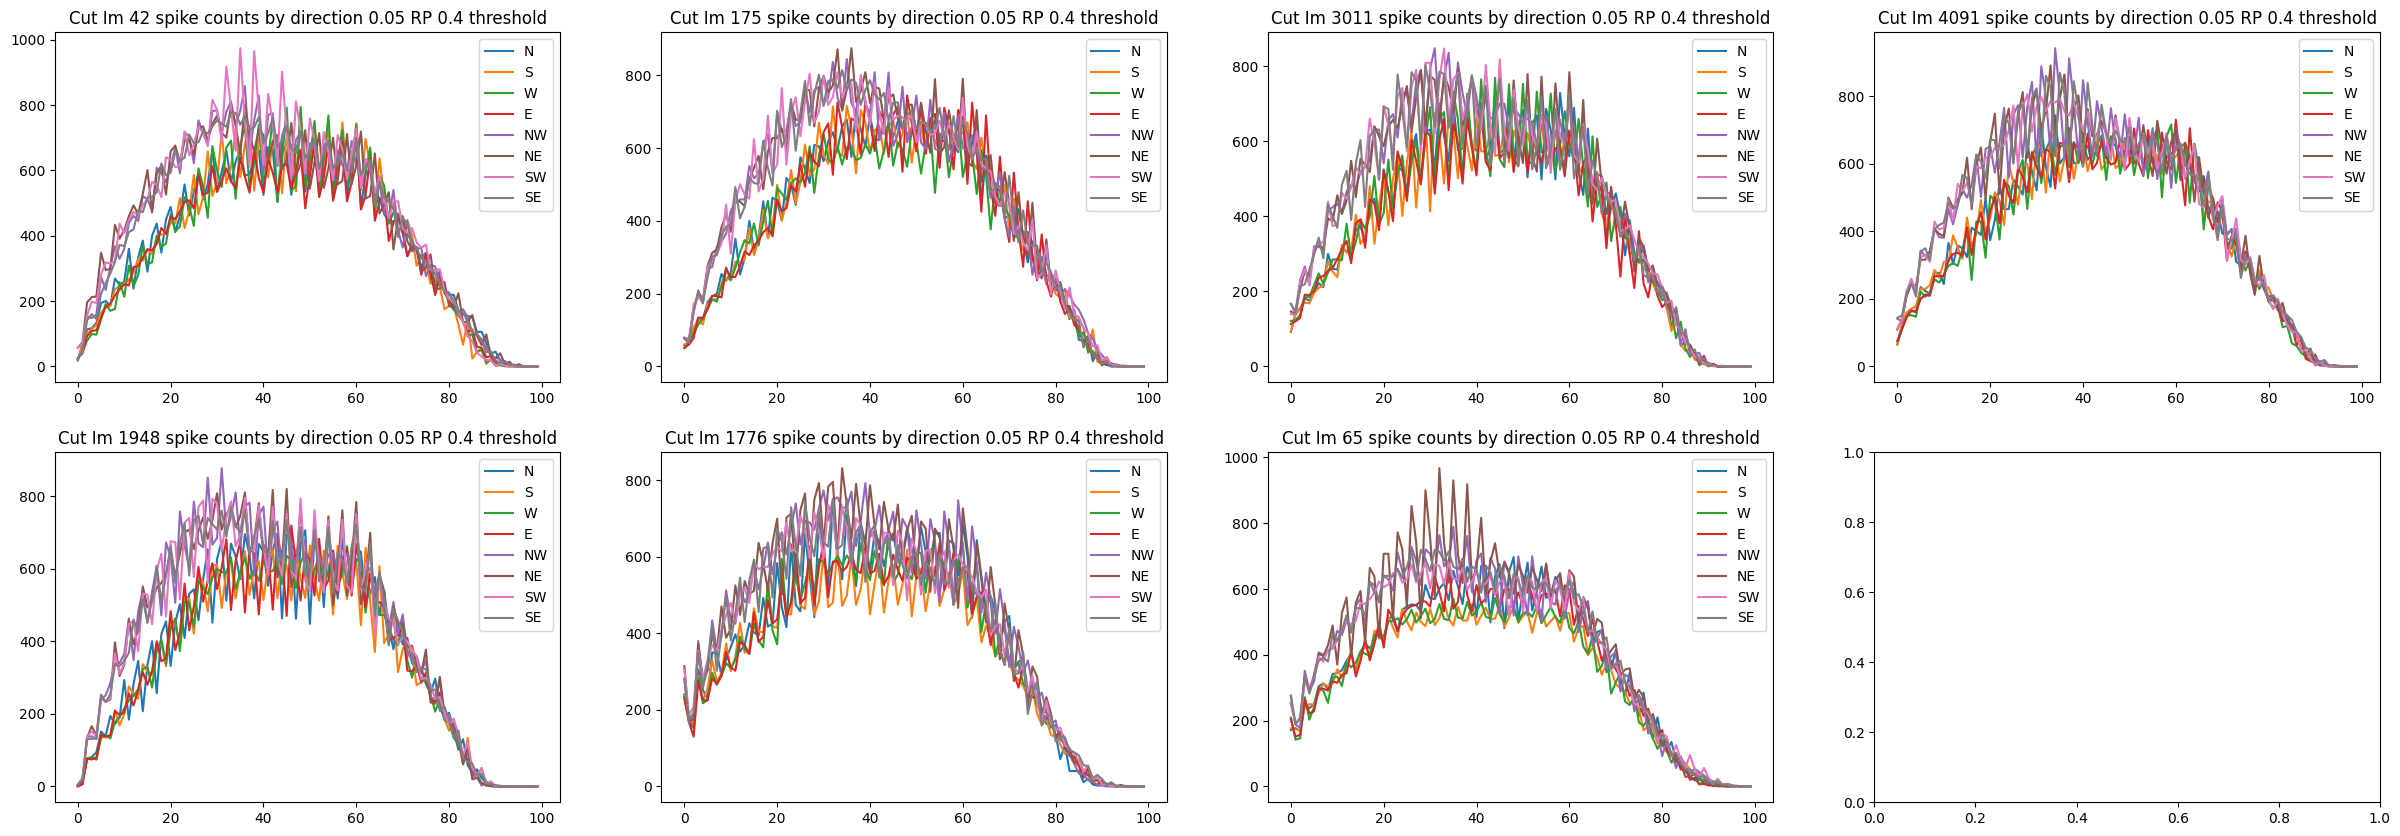

In [20]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):

    if i < len(ix_cut):
        ix = list(ix_cut.keys())[i]
        pd.DataFrame(ix_cut[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['high']} RP {threshold_list['med']} threshold", ax = ax)
plt.show()

### High RP, high threshold

In [21]:
ix_raw = {}
ix_cut = {}
for ix in imix_list:
    rawspikecount, cleanspikecount = get_spikes_by_direc(imix=ix,refrac_pd=refrac_pd_list['high'],threshold=threshold_list['high'],nsteps=60,npause=40)
    ix_raw[ix] = rawspikecount
    ix_cut[ix] = cleanspikecount

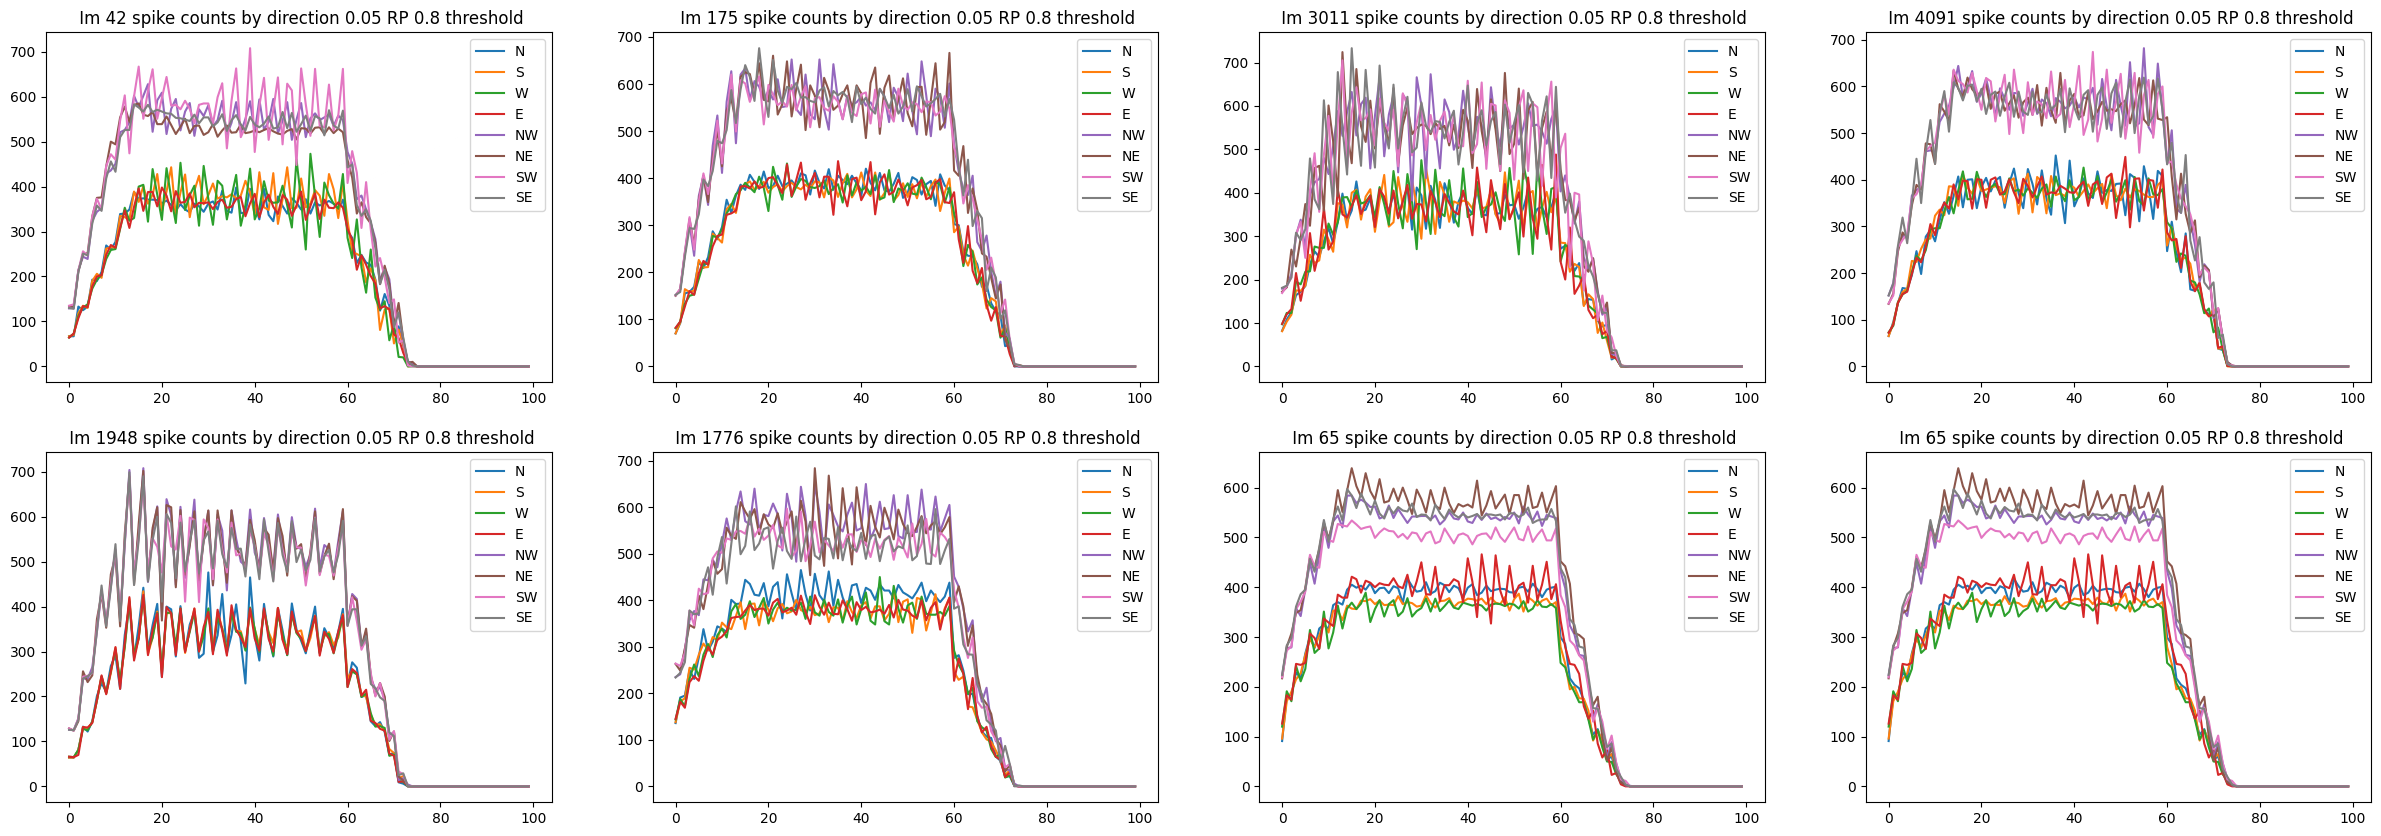

In [22]:
cut = ""
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    if i < len(ix_raw):
        ix = list(ix_raw.keys())[i]
        pd.DataFrame(ix_raw[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['high']} RP {threshold_list['high']} threshold",ax = ax)

plt.show()

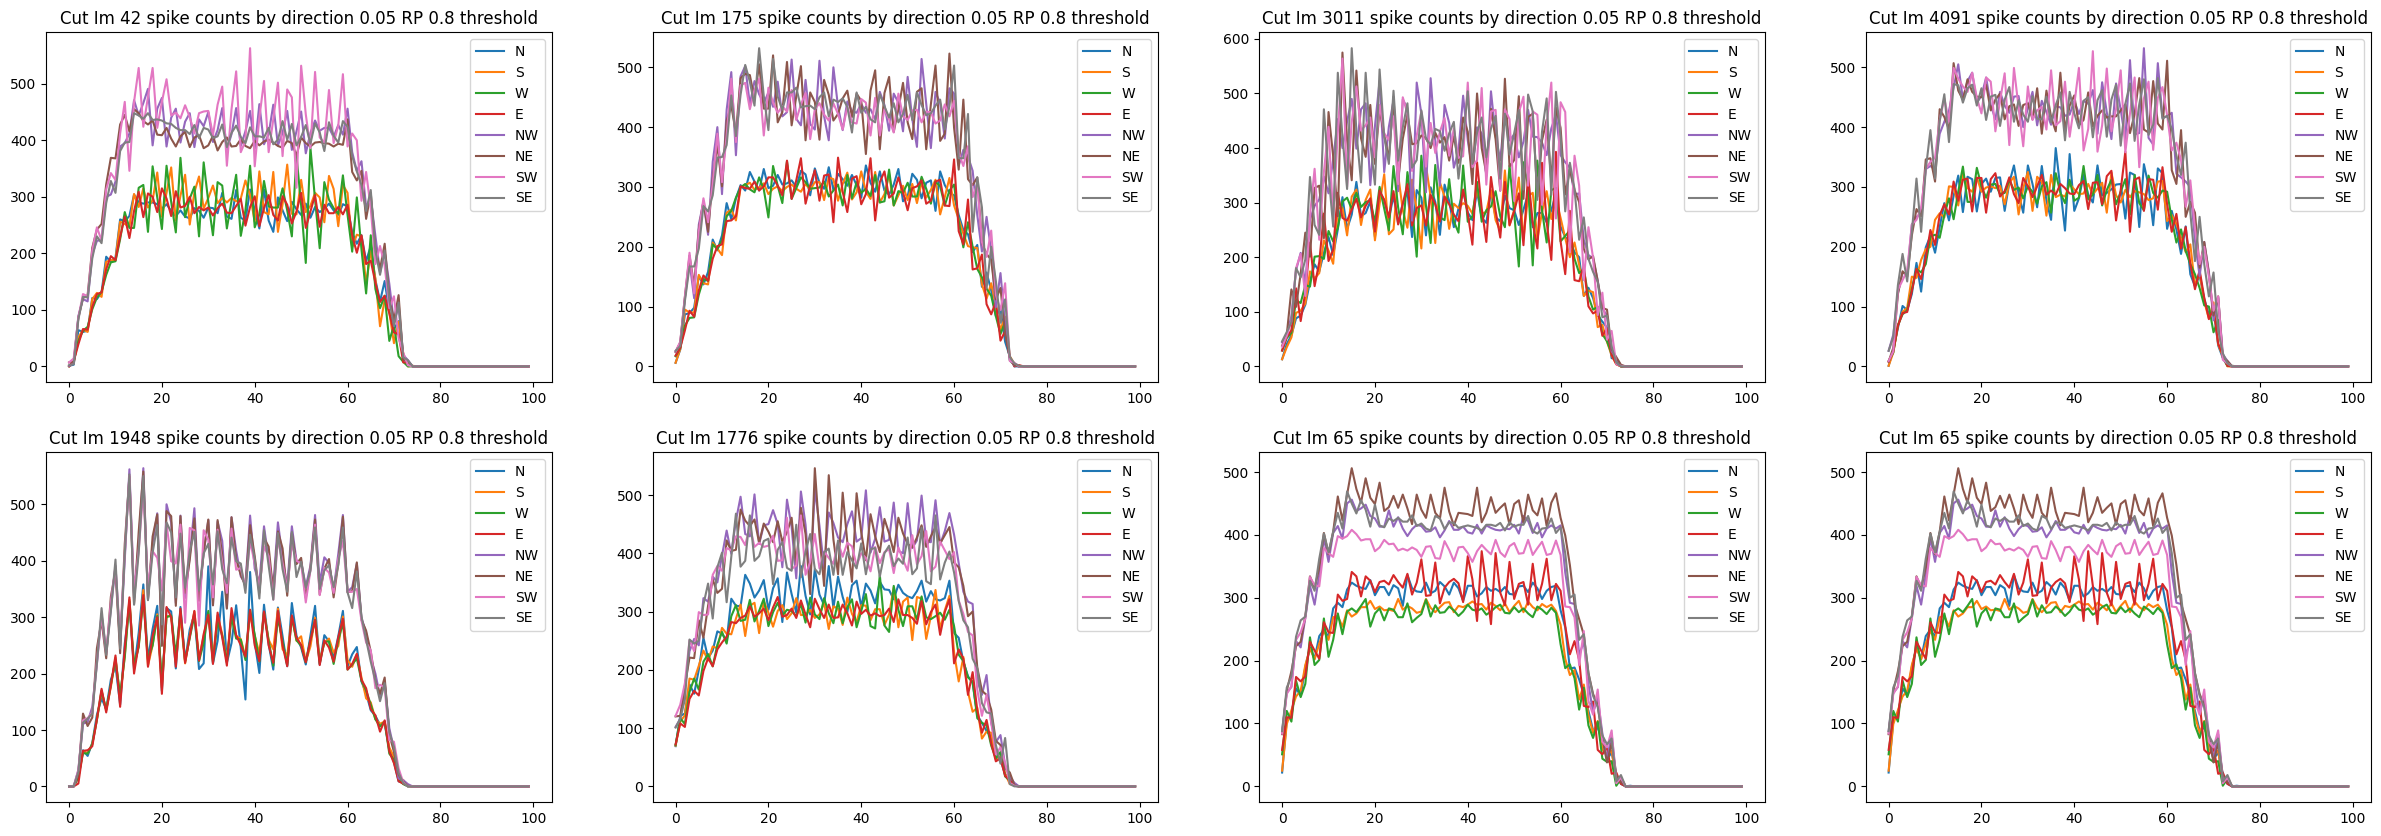

In [23]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):

    if i < len(ix_cut):
        ix = list(ix_cut.keys())[i]
        pd.DataFrame(ix_cut[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['high']} RP {threshold_list['high']} threshold",ax=ax)

plt.show()

### Med RP, med threshold

In [24]:
ix_raw = {}
ix_cut = {}
for ix in imix_list:
    rawspikecount, cleanspikecount = get_spikes_by_direc(imix=ix,refrac_pd=refrac_pd_list['med'],threshold=threshold_list['med'],nsteps=60,npause=40)
    ix_raw[ix] = rawspikecount
    ix_cut[ix] = cleanspikecount

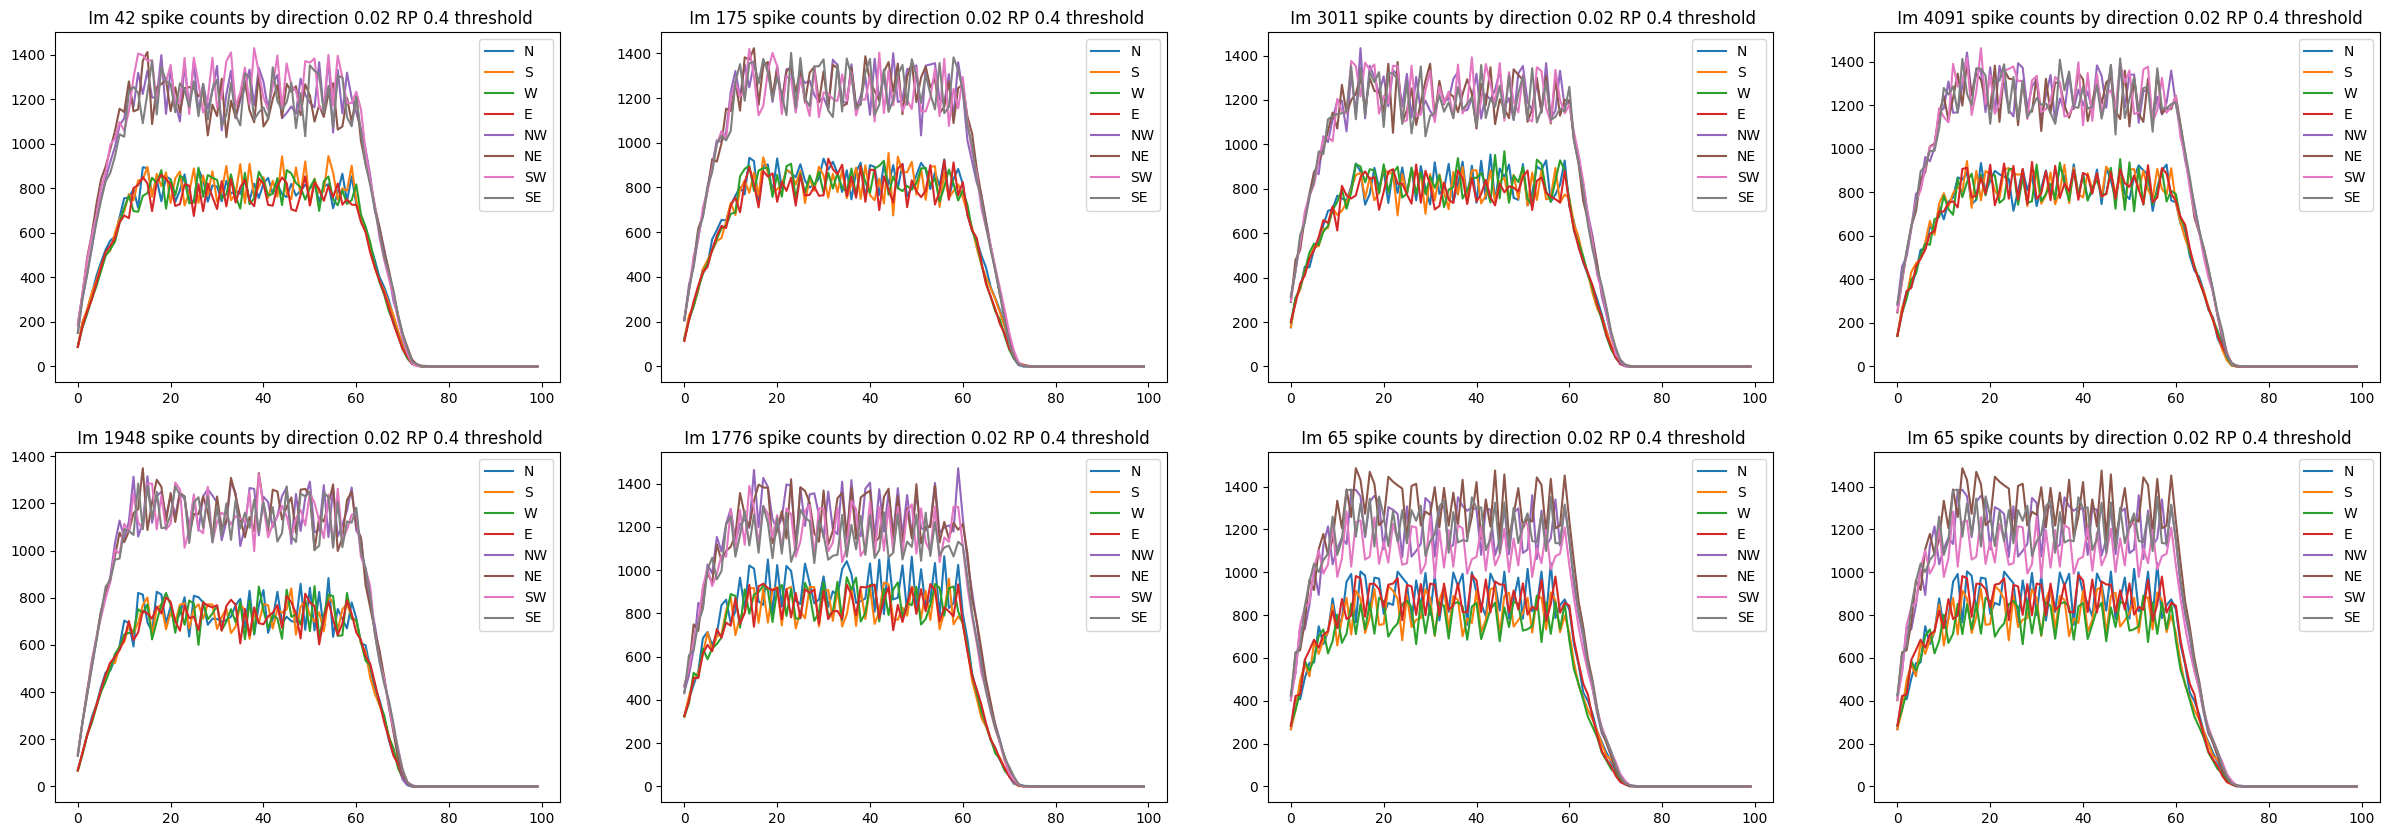

In [25]:
cut = ""
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    if threshold")i < len(ix_raw):
        ix = list(ix_raw.keys())[i]
        pd.DataFrame(ix_raw[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['med']} RP {threshold_list['med']} threshold",ax=ax)
plt.show()

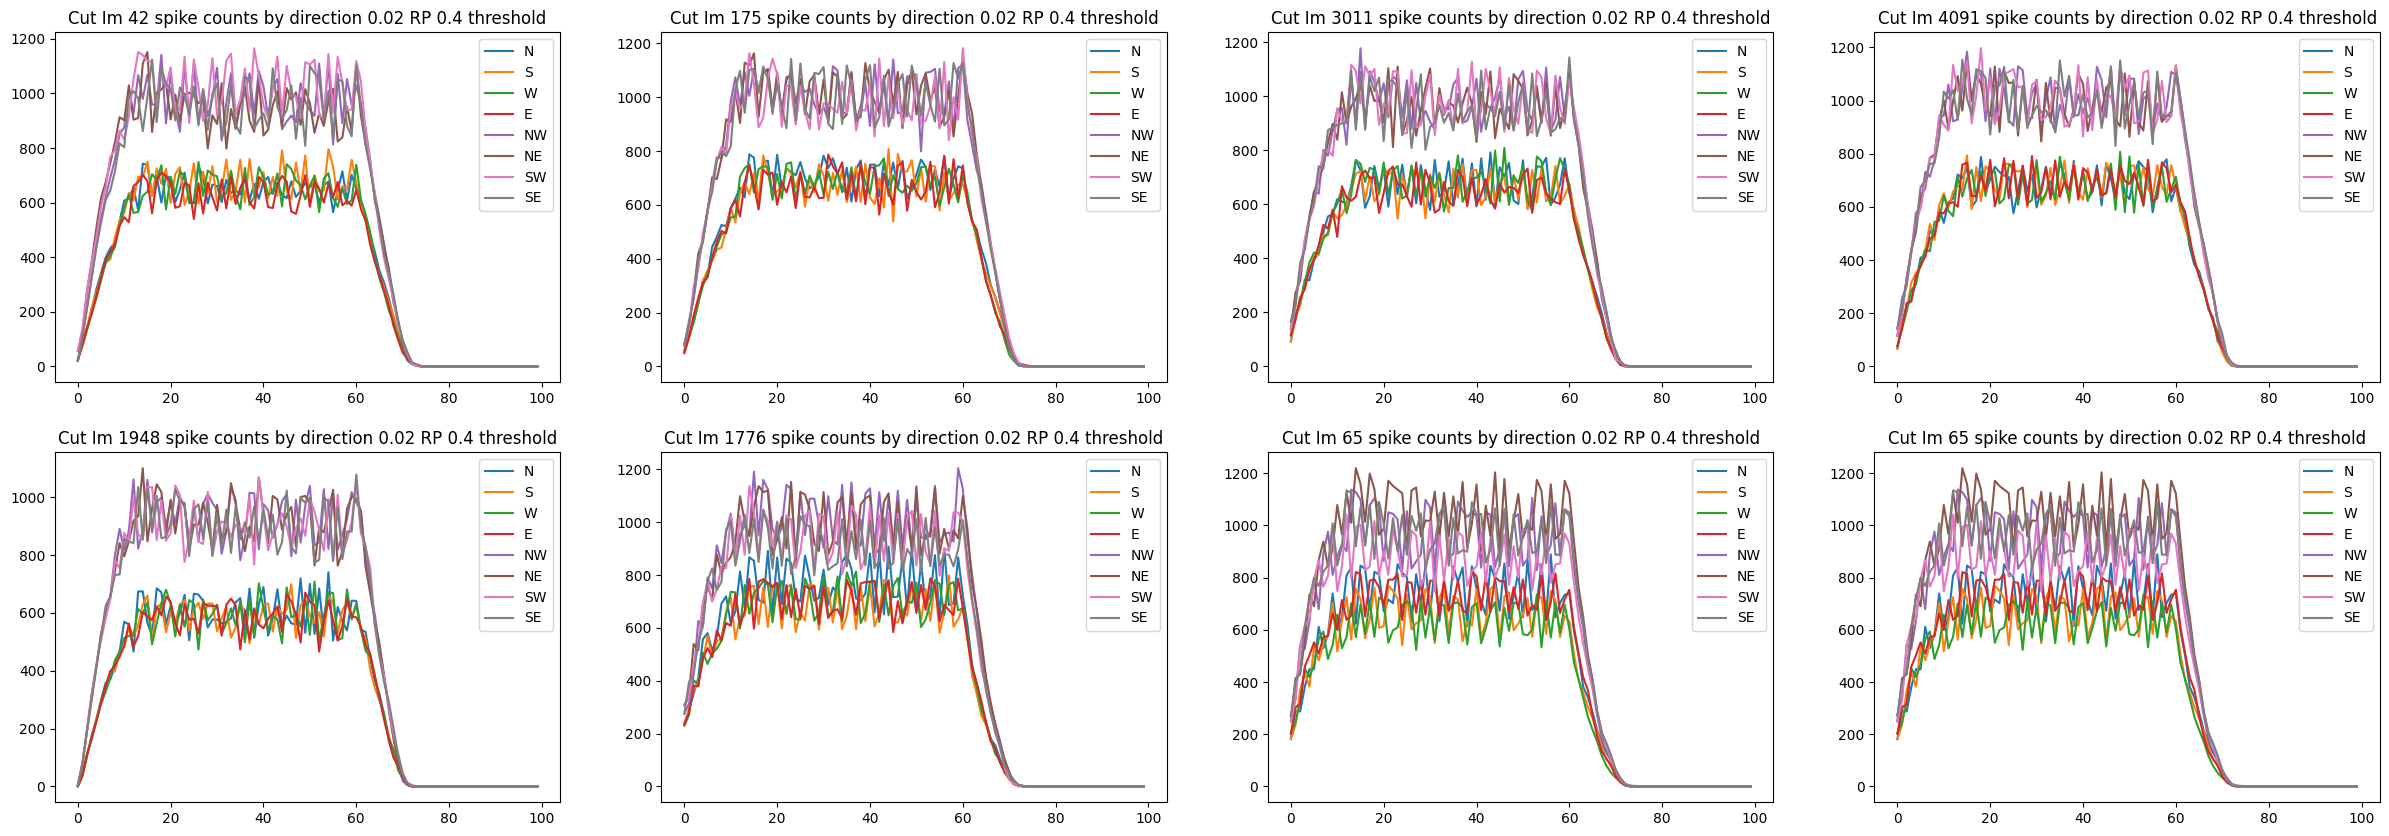

In [26]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):

    if i < len(ix_cut):
        ix = list(ix_cut.keys())[i]
        pd.DataFrame(ix_cut[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['med']} RP {threshold_list['med']} threshold", ax=ax)

plt.show()

### Med RP, high threshold

In [27]:
ix_raw = {}
ix_cut = {}
for ix in imix_list:
    rawspikecount, cleanspikecount = get_spikes_by_direc(imix=ix,refrac_pd=refrac_pd_list['med'],threshold=threshold_list['high'],nsteps=60,npause=40)
    ix_raw[ix] = rawspikecount
    ix_cut[ix] = cleanspikecount

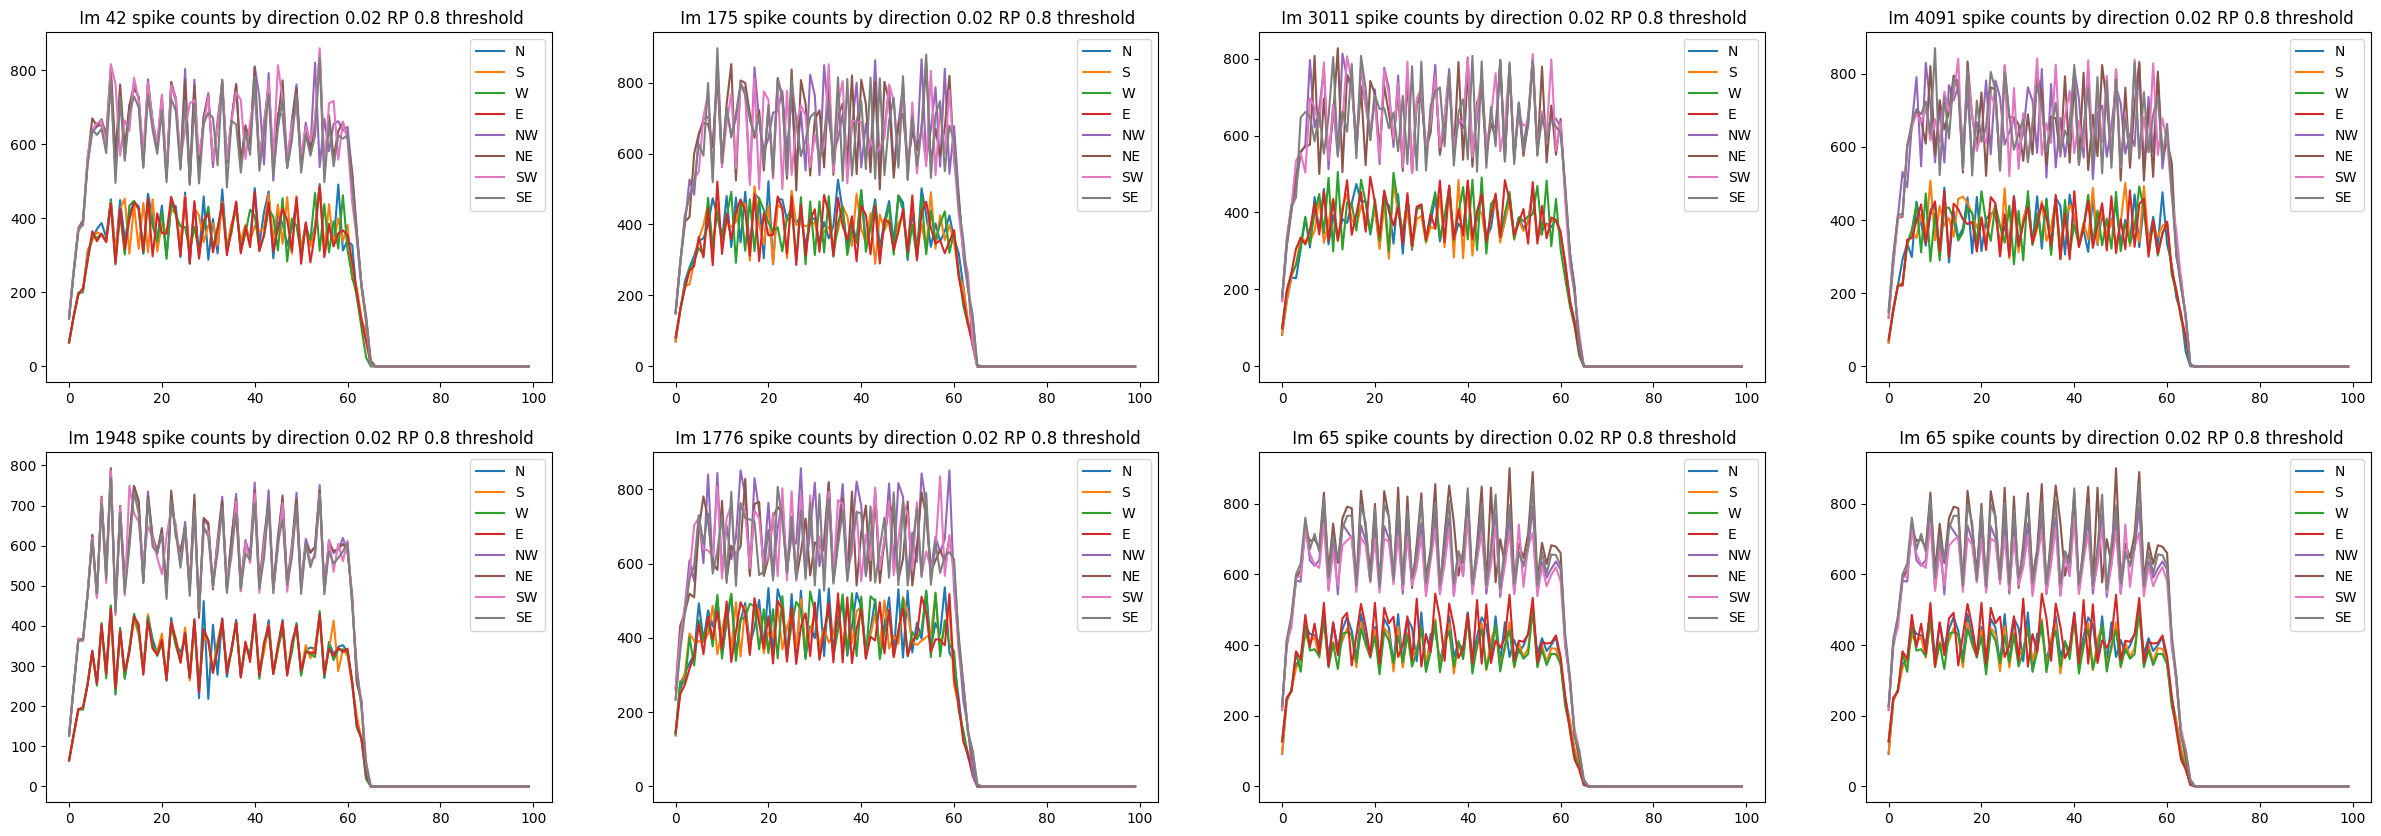

In [28]:
cut = ""
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    if i < len(ix_raw):
        ix = list(ix_raw.keys())[i]
        pd.DataFrame(ix_raw[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['med']} RP {threshold_list['high']} threshold",ax=ax)
plt.show()

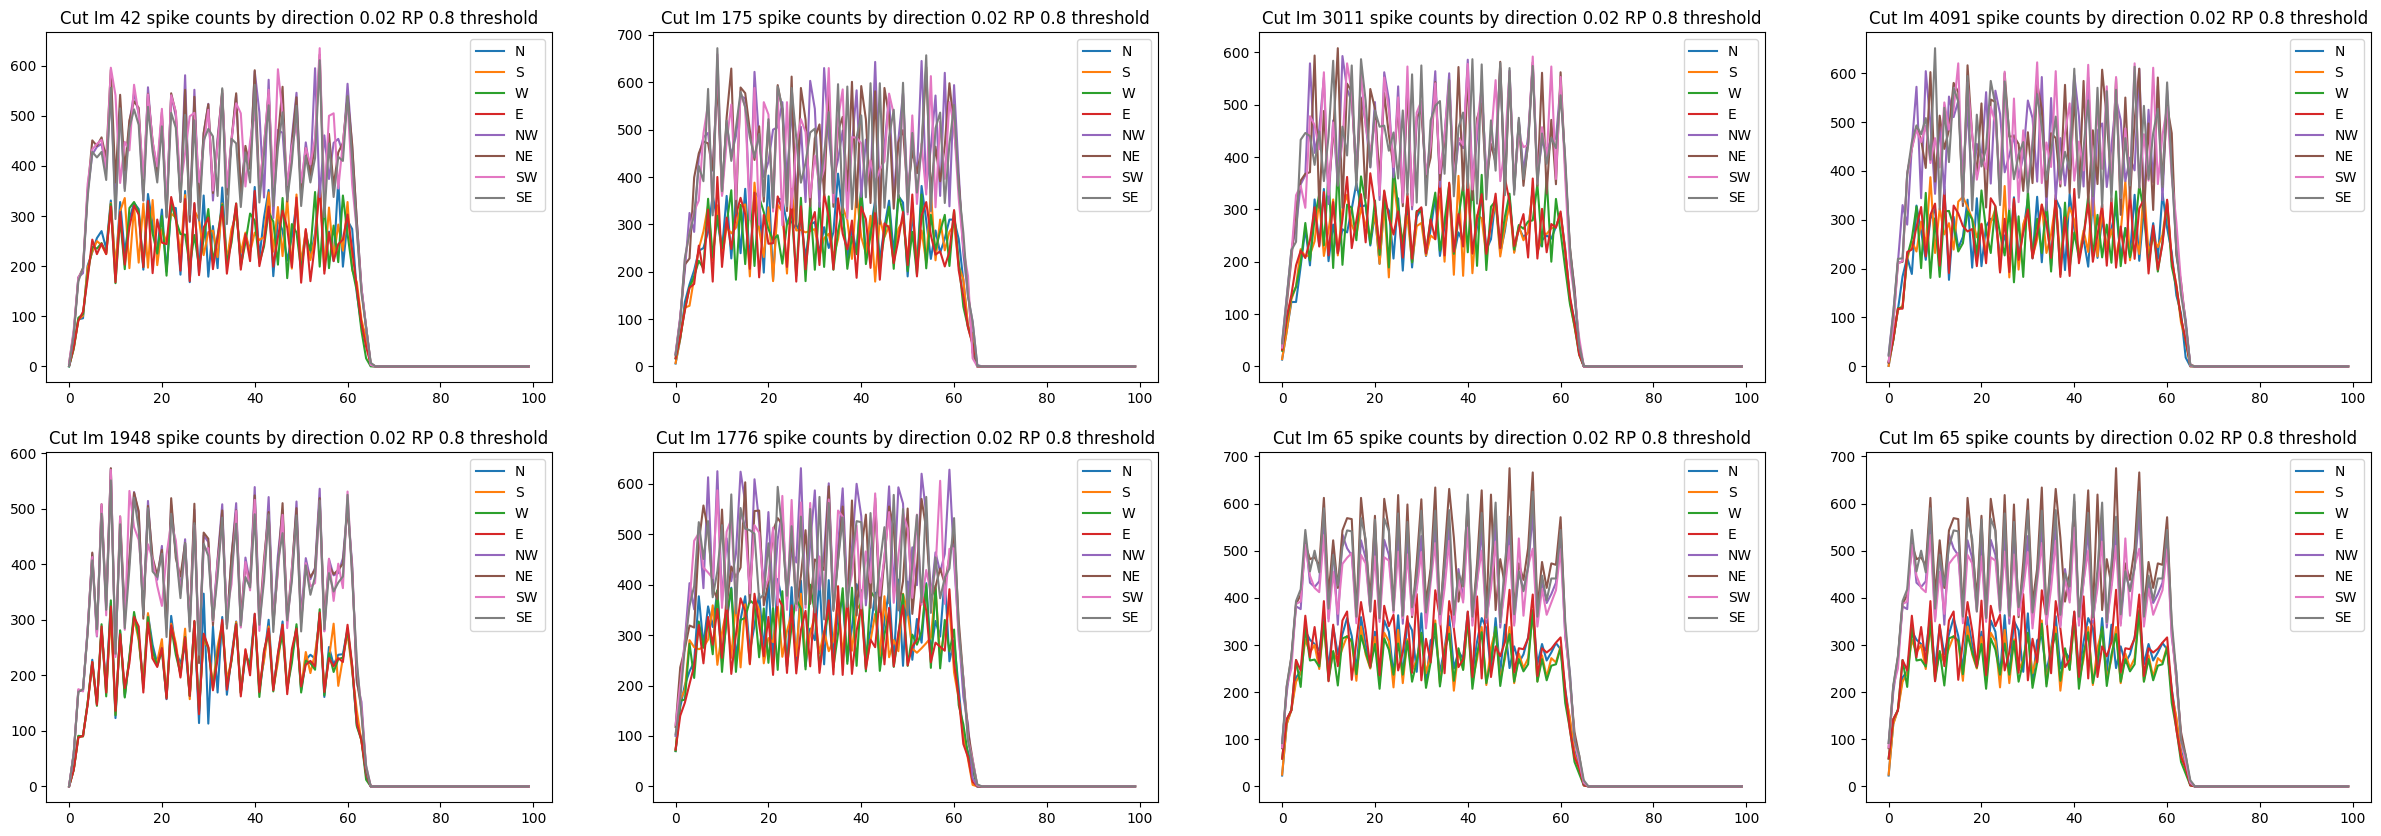

In [29]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):

    if i < len(ix_cut):
        ix = list(ix_cut.keys())[i]
        pd.DataFrame(ix_cut[ix]).plot(title=f"{cut} Im {ix} spike counts by direction {refrac_pd_list['med']} RP {threshold_list['high']} threshold",ax=ax)
plt.show()

## Visualizing the walk 

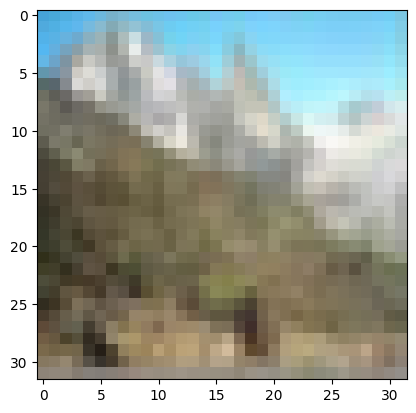

In [9]:
img = np.array(CIFAR[42][0])
plt.imshow(img)

In [7]:
img.dtype

dtype('uint8')

In [8]:
img.shape

(32, 32, 3)

In [ ]:
swap_img = np.swapaxes(img,0,1)
plt.imshow(swap_img)

In [ ]:
plt.imshow(imgT)

In [ ]:
rot_img = np.rot90(img, axes=(0,1))
plt.imshow(rot_img)

In [22]:
imix = 1948
refrac_pd = refrac_pd_list['no']
threshold = threshold_list['med']
vec = "N"
nsteps = 6


In [23]:

events, traj = im2events(img=imix,vec=vec,refrac_pd=refrac_pd, neg_thres=threshold,pos_thres=threshold, nsteps=nsteps,frame_h = 96, frame_w = 96)

In [24]:
events

[array([[ 1.4285714e-03,  3.1000000e+01,  4.5000000e+01,  1.0000000e+00],
        [ 1.4285714e-03,  6.3000000e+01,  4.9000000e+01, -1.0000000e+00],
        [ 1.4285714e-03,  3.1000000e+01,  3.4000000e+01,  1.0000000e+00],
        ...,
        [ 1.8571429e-02,  6.3000000e+01,  5.5000000e+01, -1.0000000e+00],
        [ 1.8571429e-02,  6.3000000e+01,  4.9000000e+01, -1.0000000e+00],
        [ 2.0000000e-02,  6.3000000e+01,  4.9000000e+01, -1.0000000e+00]],
       dtype=float32),
 array([[ 2.153846e-02,  6.200000e+01,  4.400000e+01, -1.000000e+00],
        [ 2.153846e-02,  6.200000e+01,  5.300000e+01, -1.000000e+00],
        [ 2.153846e-02,  3.000000e+01,  4.600000e+01,  1.000000e+00],
        ...,
        [ 4.000000e-02,  6.200000e+01,  5.300000e+01, -1.000000e+00],
        [ 4.000000e-02,  6.200000e+01,  6.000000e+01, -1.000000e+00],
        [ 4.000000e-02,  6.200000e+01,  3.700000e+01, -1.000000e+00]],
       dtype=float32),
 array([[ 4.1428570e-02,  2.9000000e+01,  4.0000000e+01,  1.00

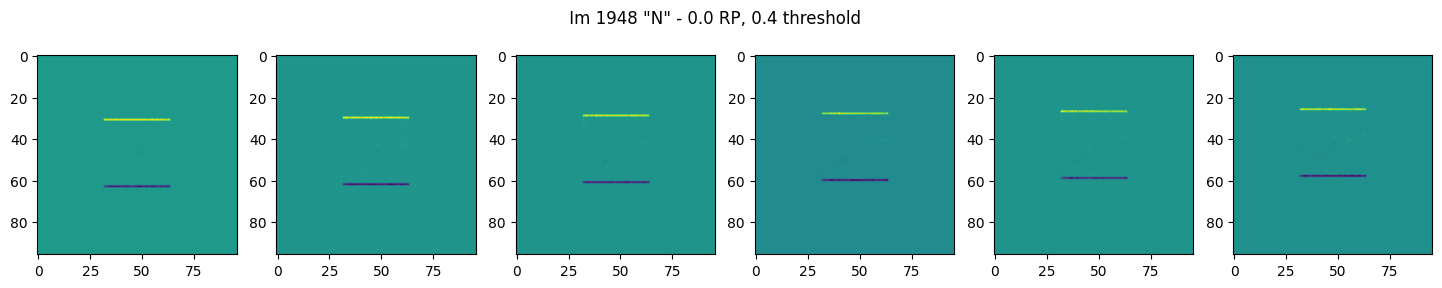

In [25]:
_cut = ""

fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(18,3))
for i,ax in enumerate(axs):
    frame = events[i]
    sensor = np.zeros([96,96])
    off_events = frame[np.where(frame[:,3] == -1)][:,1:3]

    on_events = frame[np.where(frame[:,3] == 1)][:,1:3]

    for off in off_events:
        sensor[int(off[0]),int(off[1])] -= 1

    for on in on_events:
        sensor[int(on[0]),int(on[1])] += 1
    ax.imshow(sensor)
plt.suptitle(f"{_cut} Im {imix} \"{vec}\" - {refrac_pd} RP, {threshold} threshold")
plt.show()    

In [26]:
cut, _ = cutEdges(events,traj)

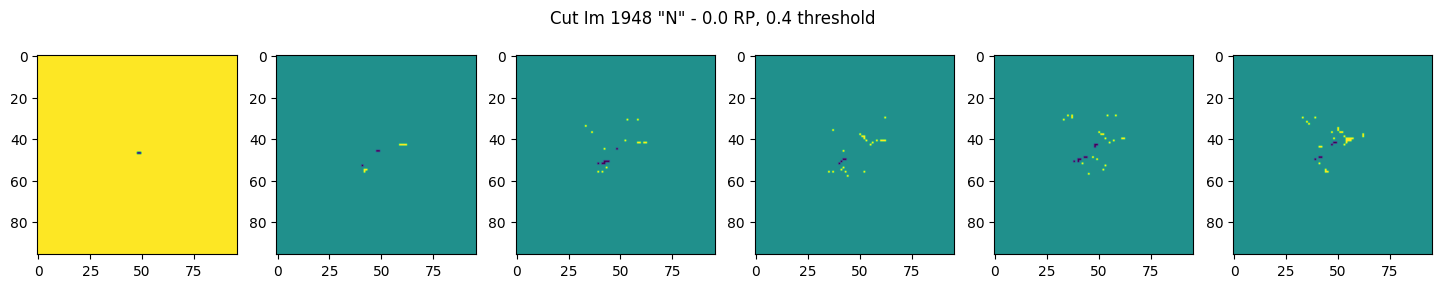

In [27]:
_cut = "Cut"
fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(18,3))
# for events which are all frame 
# for i,ax in enumerate(axs):
for i in range(len(cut)):

    ax = axs[i]
    sensor = np.zeros([96,96])

    
    frame = cut[i]
    off_events = frame[np.where(frame[:,3] == -1)][:,1:3]
    on_events = frame[np.where(frame[:,3] == 1)][:,1:3]

    for off in off_events:
        sensor[int(off[0]),int(off[1])] -= 1

    for on in on_events:
        sensor[int(on[0]),int(on[1])] += 1
    
    ax.imshow(sensor)
plt.suptitle(f"{_cut} Im {imix} \"{vec}\" - {refrac_pd} RP, {threshold} threshold")
plt.show()    

## Asymmetric spiking

In [9]:
imix = 0
refrac_pd = refrac_pd_list['no']
threshold = threshold_list['med']
_vec = "W"
h,w = 96,96
dark = 125
light = 255
bg = 0 

In [10]:
# black
img_half = np.zeros([32,32], np.uint8)

img_half[:,16:] = dark

# white
img_half[:,:16] = light

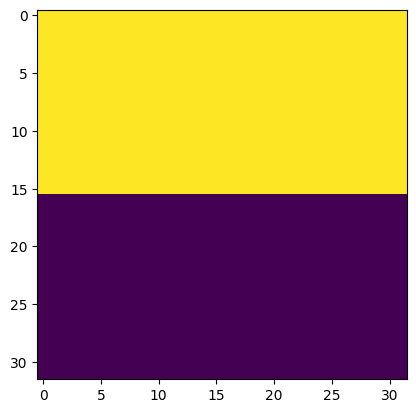

In [11]:
plt.imshow(np.swapaxes(img_half,0,1))

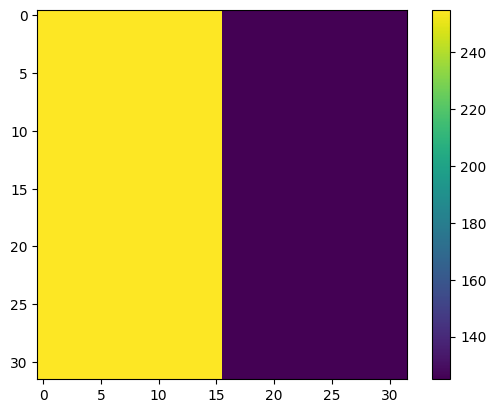

In [12]:
plt.imshow(img_half)
plt.colorbar()

In [30]:
coords = [32,32]
frame = np.zeros((h,w),dtype=int) + 125 # MOD
frame[coords[0]:coords[0]+ IM_SIZE,coords[1]:coords[1]+IM_SIZE] = img_half

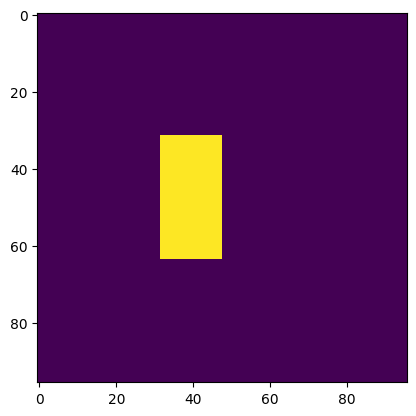

In [31]:
plt.imshow(frame)

In [36]:
img_half.shape

(32, 32)

In [37]:
img_half.sum()

130560

In [14]:
CAMERA_RES[1]

96

In [13]:
# emulator_utils.lin_log returns zero for both grating and img_half and therefore events => 0 
events_, traj_ = im2events(img = img_half, nsteps=30,vec=_vec)


/home/renaj/DIQ/diqenv/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [14]:
jump = 20

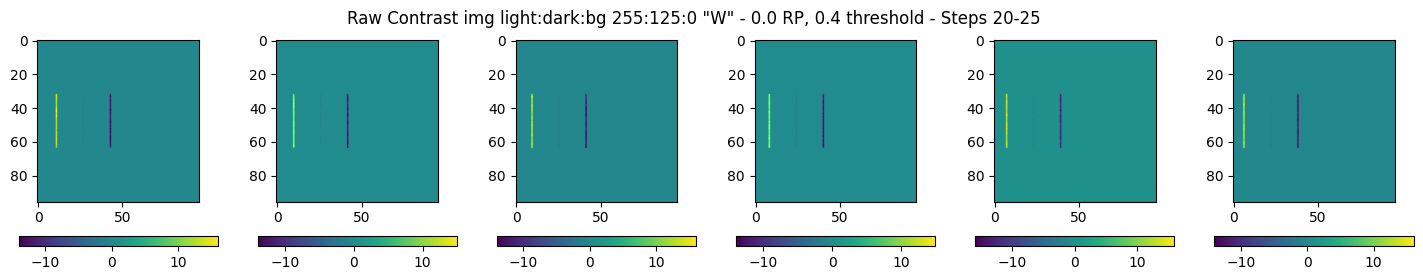

In [15]:
_cut = "Raw"

fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(18,3))
for i,ax in enumerate(axs):
    f = i + jump
    frame = events_[f]
    sensor = np.zeros([96,96])
    # sensor = np.zeros([DVS_RES[0],DVS_RES[1]])
    off_events = frame[np.where(frame[:,3] == -1)][:,1:3]

    on_events = frame[np.where(frame[:,3] == 1)][:,1:3]

    for off in off_events:
        sensor[int(off[0]),int(off[1])] -= 1

    for on in on_events:
        sensor[int(on[0]),int(on[1])] += 1
    p = ax.imshow(sensor)
    plt.colorbar(p,orientation='horizontal')
plt.suptitle(f"{_cut} Contrast img light:dark:bg {light}:{dark}:{bg} \"{_vec}\" - {refrac_pd} RP, {threshold} threshold - Steps {jump}-{f}")
plt.show()    

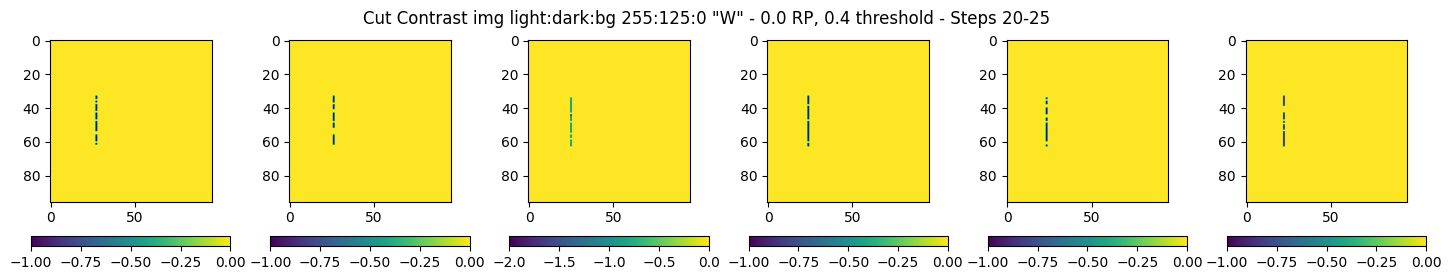

In [16]:
cut_, _ = cutEdges(events_,traj_)
_cut = "Cut"
fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(18,3))
# for events which are all frame 
# for i,ax in enumerate(axs):
# for i in range(len(cut_)):
for i in range(6):
    f = i + jump
    ax = axs[i]
    sensor = np.zeros([96,96])
    # sensor = np.zeros([DVS_RES[0],DVS_RES[1]])

    
    frame = cut_[f]
    off_events = frame[np.where(frame[:,3] == -1)][:,1:3]
    on_events = frame[np.where(frame[:,3] == 1)][:,1:3]

    for off in off_events:
        sensor[int(off[0]),int(off[1])] -= 1

    for on in on_events:
        sensor[int(on[0]),int(on[1])] += 1
    # TODO function for vmin, vmax to set joint colorbar 
    ax.imshow(sensor, vmin=-3, vmax=3)
    p = ax.imshow(sensor)
    plt.colorbar(p,orientation='horizontal')
plt.suptitle(f"{_cut} Contrast img light:dark:bg {light}:{dark}:{bg} \"{_vec}\" - {refrac_pd} RP, {threshold} threshold - Steps {jump}-{f}")
plt.show()    

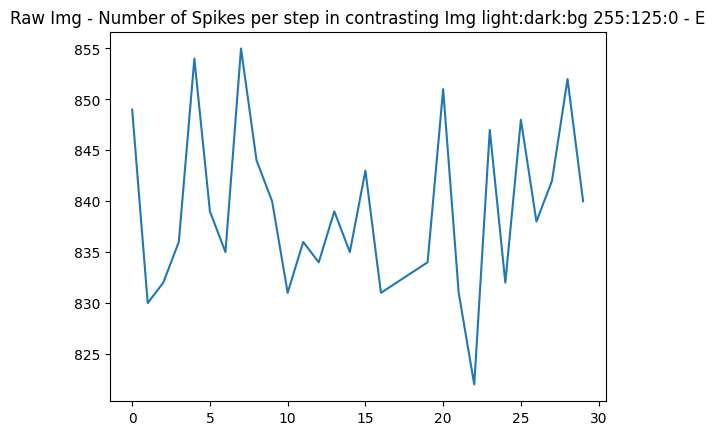

In [61]:
plt.plot([len(event) for event in events_])
plt.title(f"{_cut} Img - Number of Spikes per step in contrasting Img light:dark:bg {light}:{dark}:{bg} - {_vec}")
plt.show()

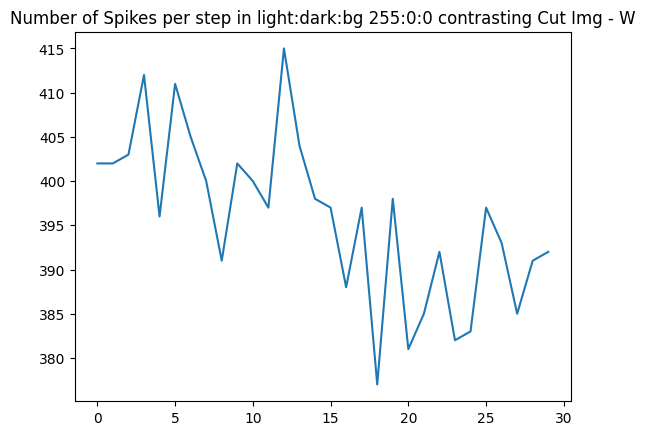

In [72]:
plt.plot([len(event) for event in cut_])
plt.title(f"Number of Spikes per step in light:dark:bg {light}:{dark}:{bg} contrasting {_cut} Img - {_vec}")
plt.show()

In [73]:
pos_cut_ = [cut_[i][cut_[i][:,3]== 1] for i in range(len(cut_))]
pos_cut_ = [len(pos) for pos in pos_cut_]

neg_cut_ = [cut_[i][cut_[i][:,3]== -1] for i in range(len(cut_))]
neg_cut_ = [len(neg) for neg in neg_cut_]

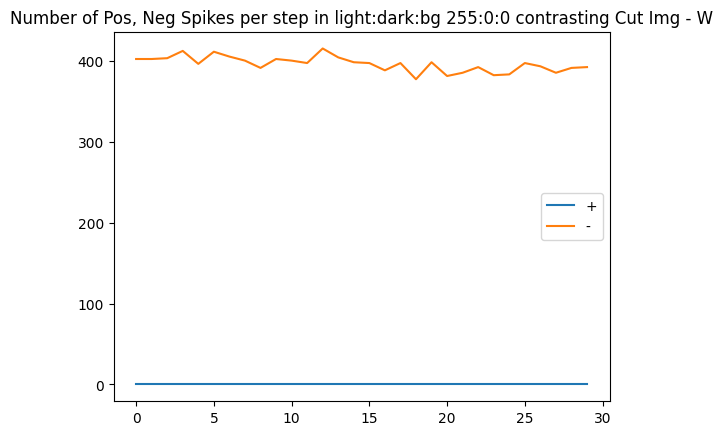

In [74]:
plt.plot(pos_cut_)
plt.plot(neg_cut_)
plt.legend(["+","-"])
plt.title(f"Number of Pos, Neg Spikes per step in light:dark:bg {light}:{dark}:{bg} contrasting {_cut} Img - {_vec}")

plt.show()

In [82]:
vec = "N"
vec in {'N','E','S','W', 'NE', 'NW', 'SE', 'SW', None}

True

## Random walks

## Info Walks

In [8]:
refrac_pd = refrac_pd_list['no']
threshold = threshold_list['med']

nsteps = 40

In [23]:

walktype = 'info'

ix_info_n = {}
ix_infovents = {}
ix_info_dir = {}
for ix in imix_list:
    events_info, counts_info, traj_info = im2events(img=ix,refrac_pd=refrac_pd, pos_thres=threshold, neg_thres=threshold, 
                                 nsteps=40,
                                 frame_h = CAMERA_RES[0],frame_w = CAMERA_RES[1],
                                 walk=walktype)
    ix_info_n[ix] = counts_info
    ix_infovents[ix] = events_info
    ix_info_dir[ix] = _traj_to_dir(traj_info)

/home/renaj/DIQ/RVTClass/im2infowalk.py:111: UserWarning: hmax at 39 is too large, reduce it to = 39 or lower - values higher than 38 have 0 probability
  warn(f"hmax at {self.hmax} is too large, reduce it to = {h+1} or lower - values higher than {h} have 0 probability")
/home/renaj/DIQ/RVTClass/im2infowalk.py:111: UserWarning: hmax at 89 is too large, reduce it to = 89 or lower - values higher than 88 have 0 probability
  warn(f"hmax at {self.hmax} is too large, reduce it to = {h+1} or lower - values higher than {h} have 0 probability")
/home/renaj/DIQ/RVTClass/im2infowalk.py:111: UserWarning: hmax at 165 is too large, reduce it to = 165 or lower - values higher than 164 have 0 probability
  warn(f"hmax at {self.hmax} is too large, reduce it to = {h+1} or lower - values higher than {h} have 0 probability")
/home/renaj/DIQ/RVTClass/im2infowalk.py:111: UserWarning: hmax at 100 is too large, reduce it to = 100 or lower - values higher than 99 have 0 probability
  warn(f"hmax at {self.hma

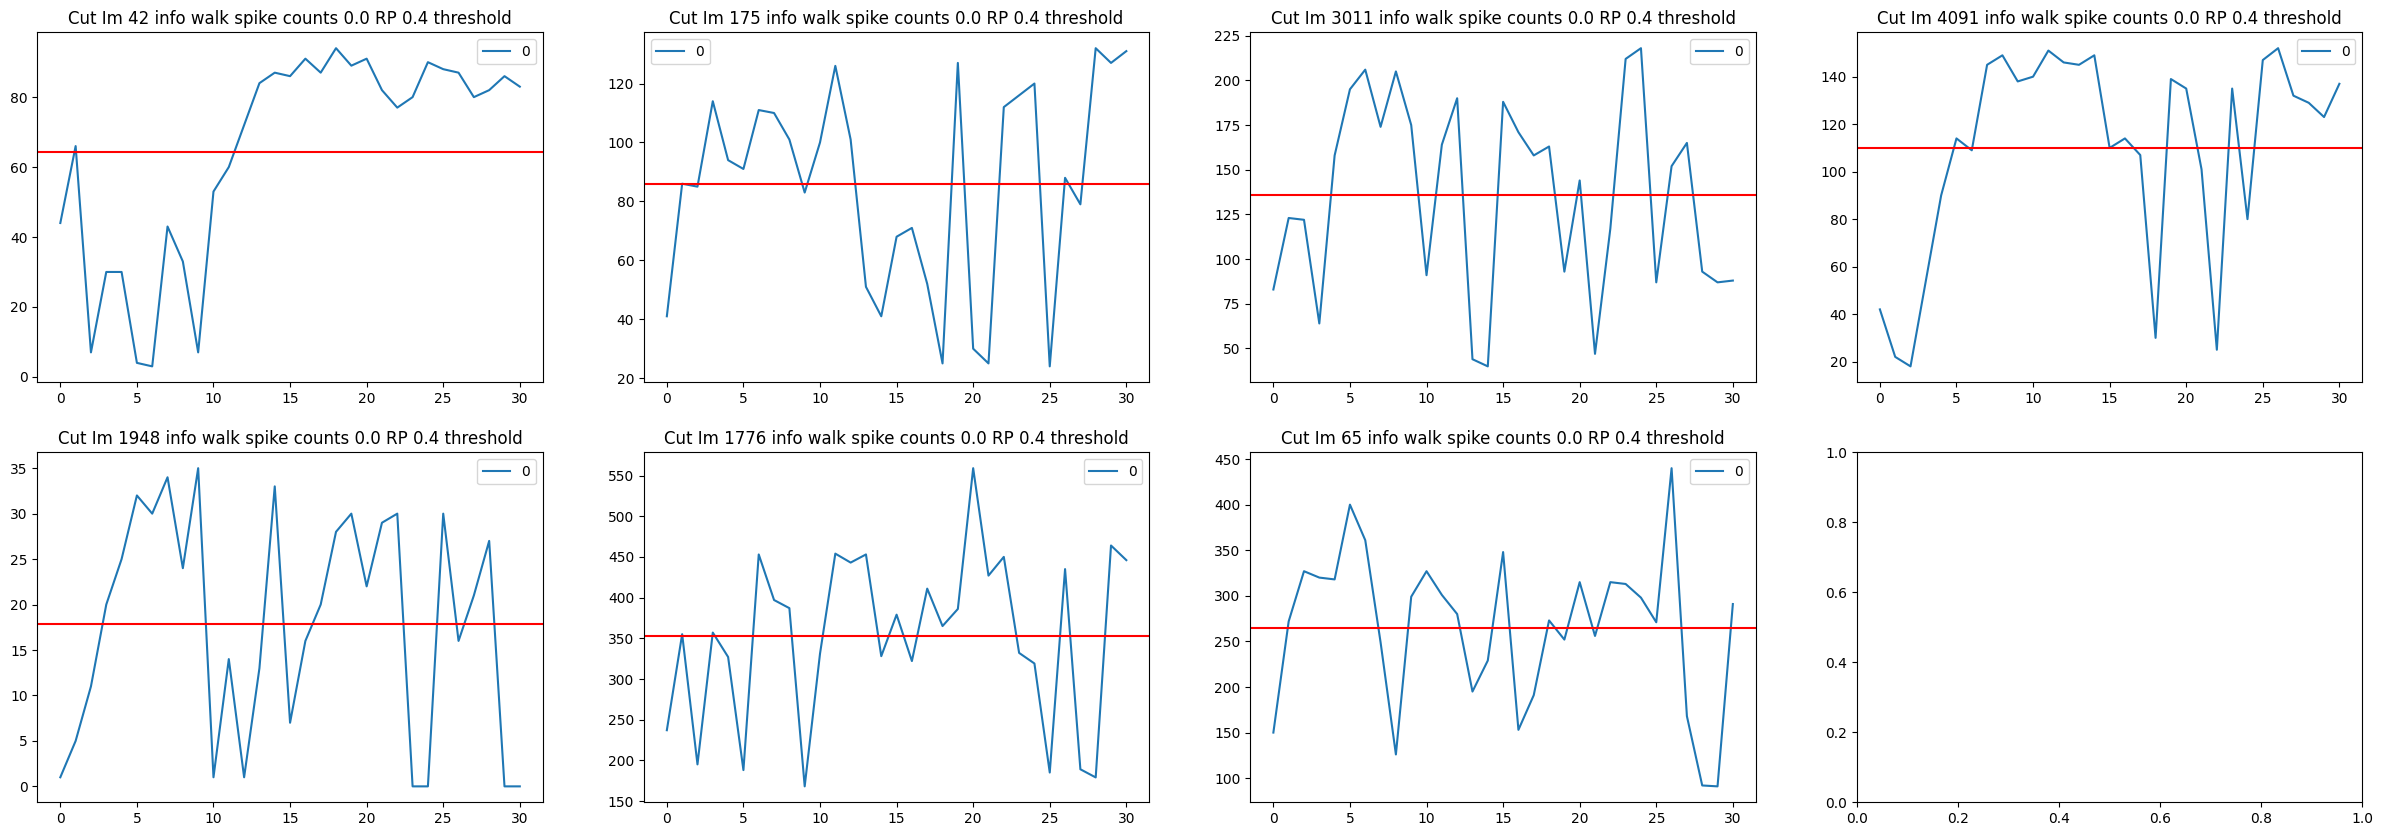

In [17]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    # for ix in ix_cut.keys():
    if i < len(ix_info_n):
        ix = list(ix_info_n.keys())[i]
        
        pd.DataFrame(ix_info_n[ix]).plot(title=f"{cut} Im {ix} {walktype} walk spike counts {refrac_pd} RP {threshold} threshold", ax = ax)
        ax.scatter(ix_info_dir)
        ax.axhline(y=np.nanmean(ix_info_n[ix]),color='r',label='Mean spikes')
plt.show()

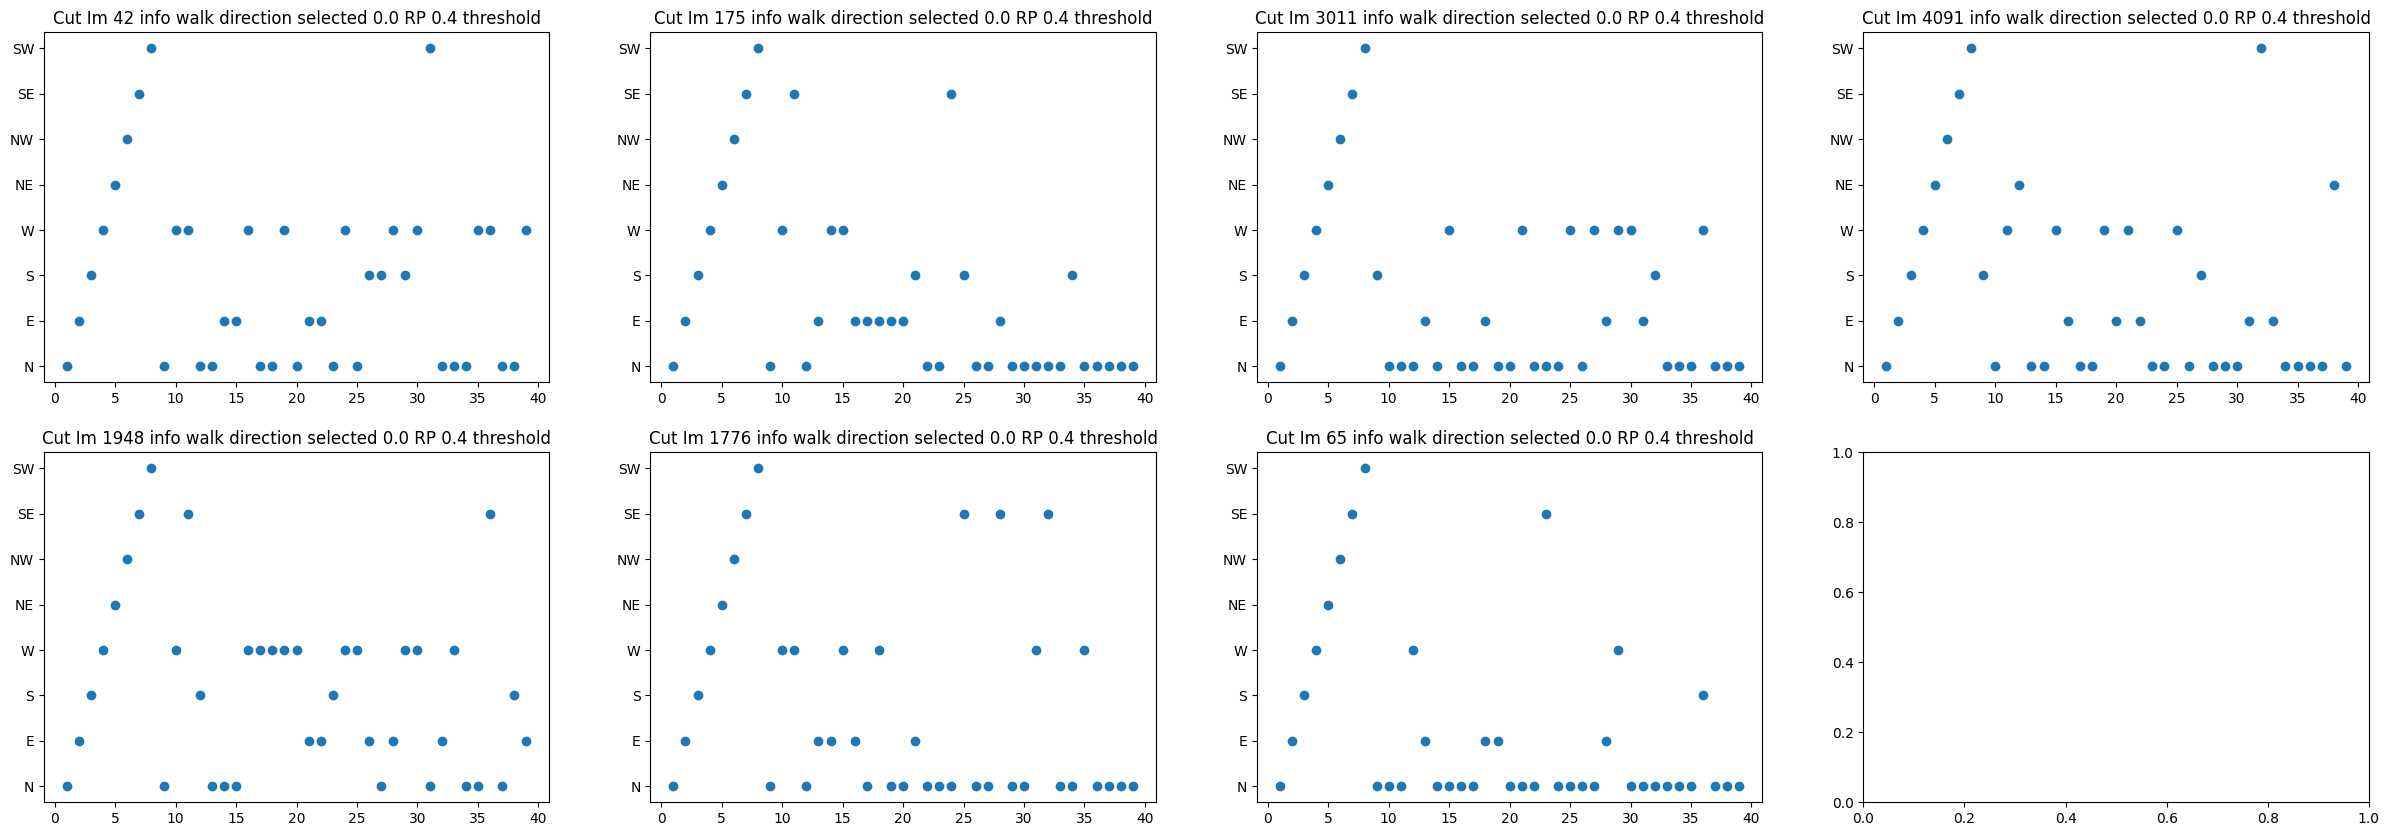

In [35]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    # for ix in ix_cut.keys():
    if i < len(ix_info_dir):
        ix = list(ix_info_dir.keys())[i]
        
        ax.scatter(np.arange(len(ix_info_dir[ix]))+1,ix_info_dir[ix])
        ax.set_title(f"{cut} Im {ix} {walktype} walk direction selected {refrac_pd} RP {threshold} threshold")
plt.show()

In [36]:

walktype = 'random'

ix_rand_n = {}
ix_randvents = {}
ix_randir = {}
for ix in imix_list:
    events_rand, counts_rand, traj_rand = im2events(img=ix,refrac_pd=refrac_pd, pos_thres=threshold, neg_thres=threshold, 
                                 nsteps=40,
                                 frame_h = CAMERA_RES[0],frame_w = CAMERA_RES[1],
                                 walk=walktype)
    ix_rand_n[ix] = counts_rand
    ix_randvents[ix] = events_rand
    ix_randir[ix] = _traj_to_dir(traj_rand)

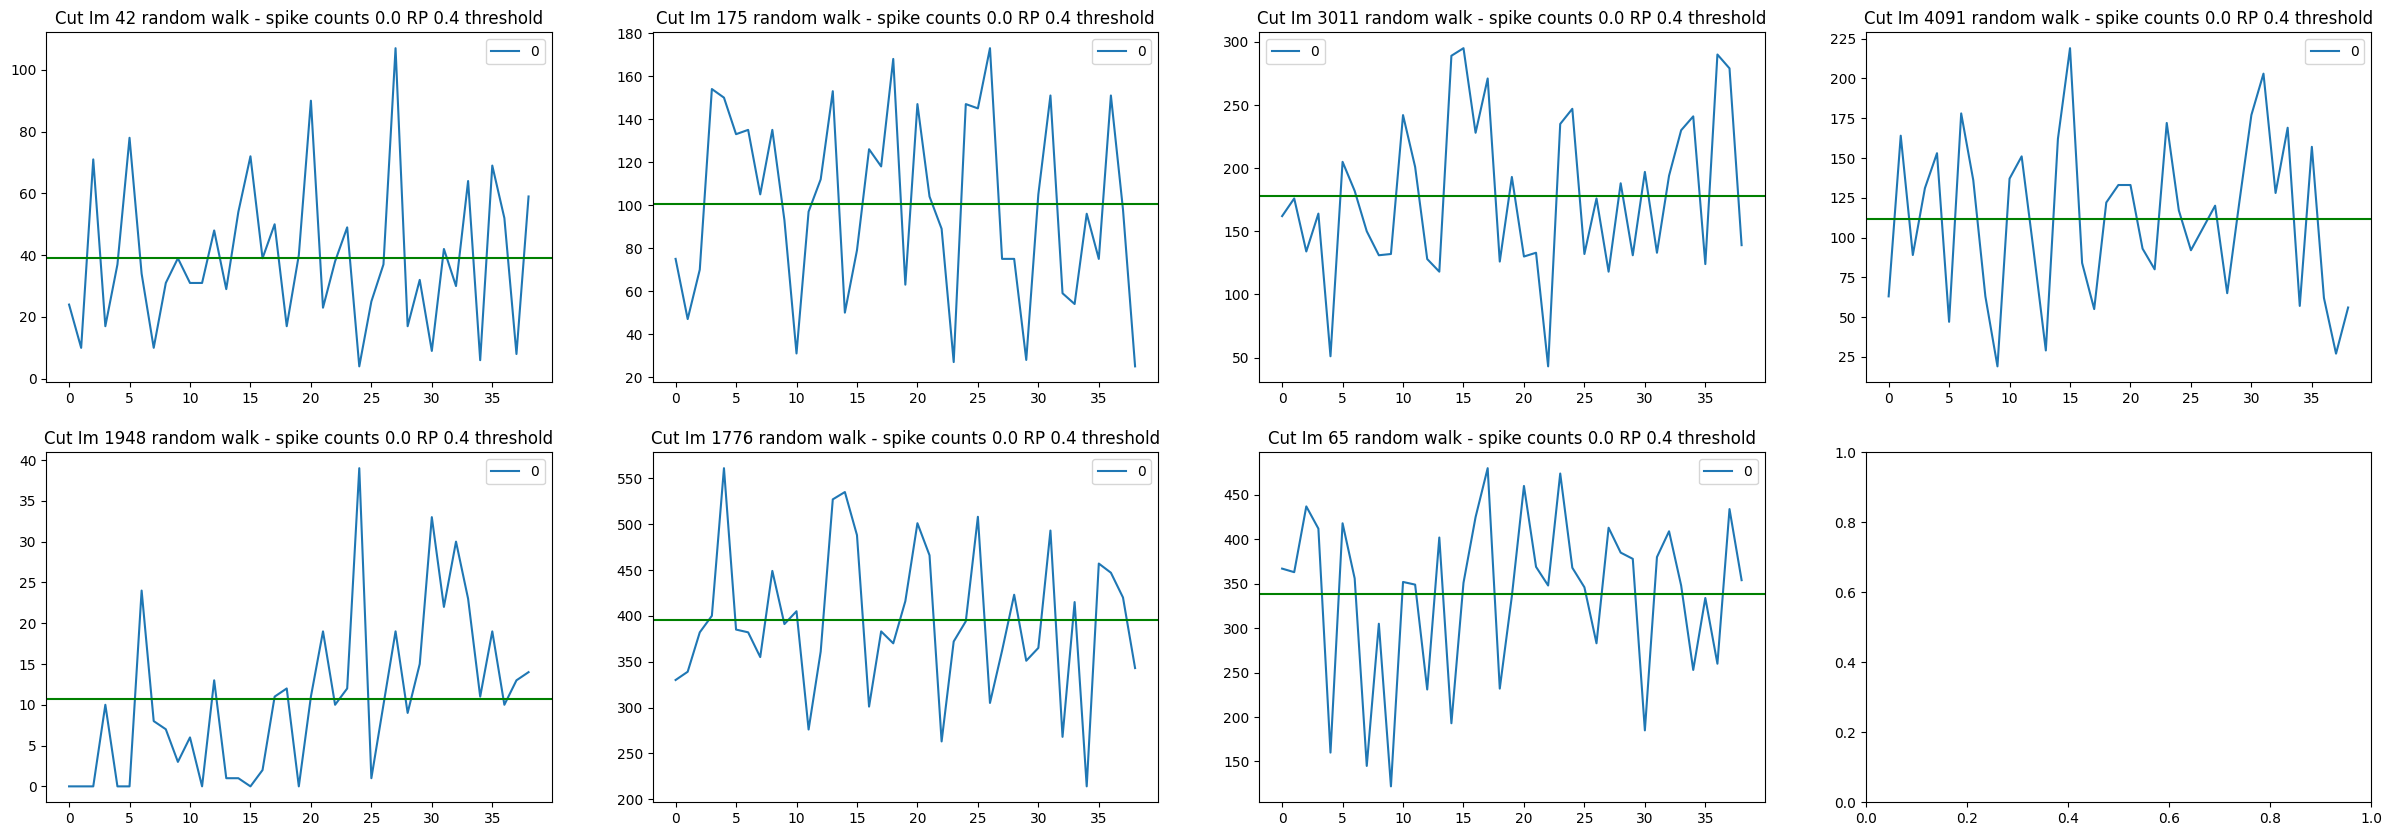

In [37]:
cut = "Cut"
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    # for ix in ix_cut.keys():
    if i < len(ix_rand_n):
        ix = list(ix_rand_n.keys())[i]
        
        pd.DataFrame(ix_rand_n[ix]).plot(title=f"{cut} Im {ix} {walktype} walk - spike counts {refrac_pd} RP {threshold} threshold", ax = ax)
        ax.axhline(y=np.nanmean(ix_rand_n[ix]),color='g',label='Mean spikes')
plt.show()

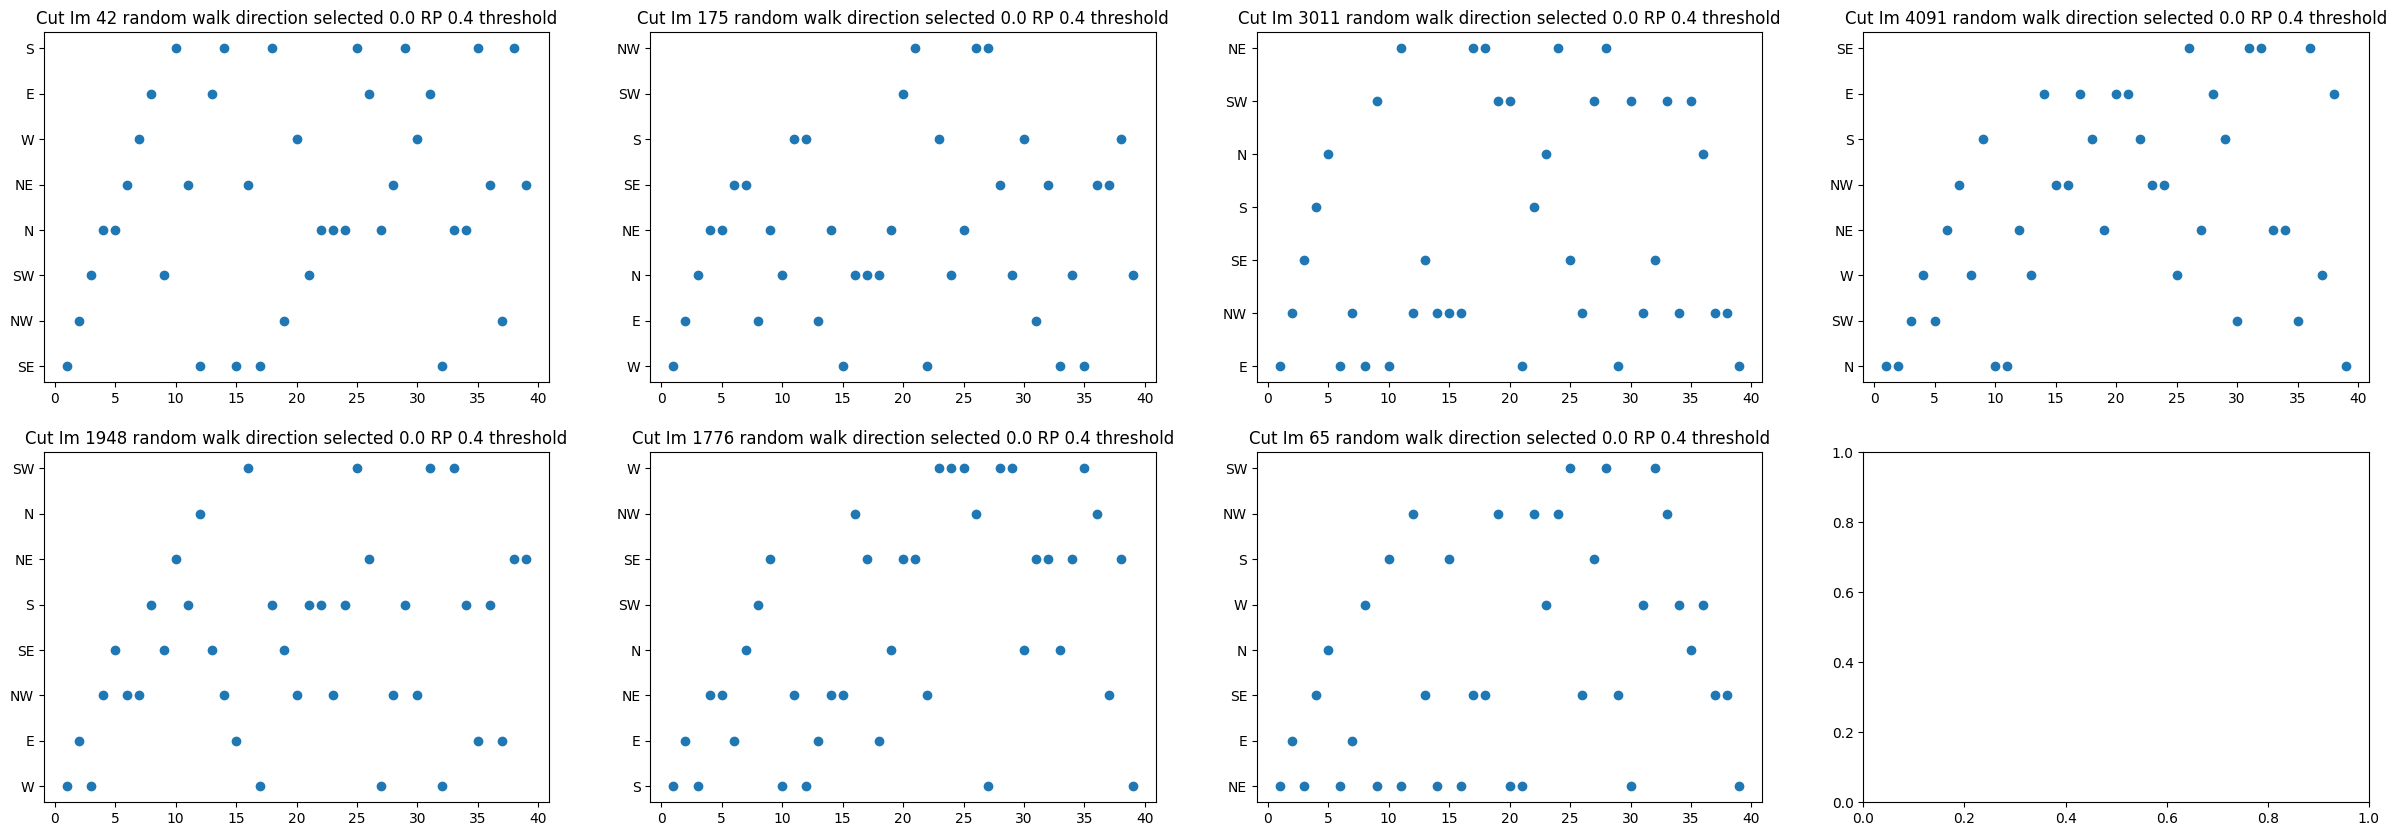

In [44]:
cut = "Cut"
dirlist = ['N','E','S','W','NE','NW','SE','SW']
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (30,10))
for i,ax in enumerate(fig.axes):
    # for ix in ix_cut.keys():
    if i < len(ix_randir):
        ix = list(ix_randir.keys())[i]
        
        # changes the text without moving around the data 
        # ax.set_yticks(np.arange(len(dirlist)))
        # ax.set_yticklabels(dirlist)
        ax.scatter(np.arange(len(ix_randir[ix]))+1,ix_randir[ix])
        ax.set_title(f"{cut} Im {ix} {walktype} walk direction selected {refrac_pd} RP {threshold} threshold")
plt.show()